In [ ]:
#Source for the Dataset: http://arxiv.org/abs/1802.10135

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1618487880&Signature=rBvNStd5mg85e4tdrbw0WB4b7DA%2BCnd5q2bU%2Fw9ffFg7AjEzJNnBir1elPO69%2FhAlv0dfLmyhq3yWnwmroLj%2B44MKntos1DBmJEwqmuACScjPDZAK9LfjY9x1T1T%2BJWSFmGrKAh8MjWEJIaVTg%2B3SXk%2FeD%2F66D3LJF9Bu3mwNI0e3jRaRHdealearEqDHPfv8FKMazOG%2FqAsLhM20%2B0XAjGdQvk0gqejE6CRlqhSyVsMnBxr4EADxUmr%2FwWJ1reVssbfDpgJSr4j6tyj9bJmBkbZc6n79yv1dnYi7NDmkliqKVzekh%2BPJVUy6kdJAmPB9jqss%2Fxg67nK598v1ewoaQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z" -c -O 'train.7z'

--2021-04-12 11:58:36--  https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1618487880&Signature=rBvNStd5mg85e4tdrbw0WB4b7DA%2BCnd5q2bU%2Fw9ffFg7AjEzJNnBir1elPO69%2FhAlv0dfLmyhq3yWnwmroLj%2B44MKntos1DBmJEwqmuACScjPDZAK9LfjY9x1T1T%2BJWSFmGrKAh8MjWEJIaVTg%2B3SXk%2FeD%2F66D3LJF9Bu3mwNI0e3jRaRHdealearEqDHPfv8FKMazOG%2FqAsLhM20%2B0XAjGdQvk0gqejE6CRlqhSyVsMnBxr4EADxUmr%2FwWJ1reVssbfDpgJSr4j6tyj9bJmBkbZc6n79yv1dnYi7NDmkliqKVzekh%2BPJVUy6kdJAmPB9jqss%2Fxg67nK598v1ewoaQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18810691091 (18G) [application/x-7z-compressed]
Saving to: ‘train.7z’

train.7z            100%[====

In [ ]:
pip install py7zr

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import py7zr

### Unzipping the Train Folder

In [ ]:
def unzip(file_name):
    a=py7zr.SevenZipFile(file_name,mode='r')
    py7zr.SevenZipFile.extractall(a)
    print("Successfully unzipped {}".format(file_name))

In [ ]:
unzip("train.7z")

Successfully unzipped train.7z


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the Requisite Libraries

In [ ]:
import os
import shutil
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from multiprocessing import Pool
import matplotlib.pyplot as plt
from nltk import word_tokenize 
from nltk.util import ngrams
from tqdm import tqdm
from tqdm import tqdm
from scipy.sparse import vstack
from scipy.sparse import save_npz
from scipy.sparse import load_npz
from scipy.sparse import vstack
from scipy.sparse import hstack
from sklearn import preprocessing
from scipy.sparse import save_npz
from scipy.sparse import coo_matrix
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

### Splitting the Byte and ASM Files and stroring the same in their respective folders

In [ ]:
os.makedirs("byte_files")

In [ ]:
data_files= os.listdir("train")

In [ ]:
data_files[0]

'C3Rd8zrwsm1FeSWhou4v.bytes'

In [ ]:
source='/home/satya_anuragh/train/'
destination= '/home/satya_anuragh/byte_files/'

In [ ]:
len(os.listdir("byte_files"))

0

In [ ]:
os.rename(source,"asm_files")

In [ ]:
len(os.listdir("asm_files"))

21736

In [ ]:
data_files = os.listdir('/home/satya_anuragh/asm_files')
for file in data_files:
    if (file.endswith("bytes")):
        shutil.move(os.path.join('/home/satya_anuragh/asm_files',file), destination)

In [ ]:
bytefiles= os.listdir("byte_files")
print(len(bytefiles))

10868


In [ ]:
asmfiles= os.listdir("asm_files")
print(len(asmfiles))

10868


In [ ]:
y= pd.read_csv("trainLabels.csv")

In [ ]:
y.shape

(10868, 2)

In [ ]:
y.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [ ]:
filenames=[]

for b_file in bytefiles:
    if b_file.endswith(".bytes"):
        b_file= b_file.split(".")[0]
        text_file= open(destination+b_file+".txt",'w+')
        with open(destination+b_file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a= line.rstrip().split(" ")[1:]
                b= ' '.join(a)
                b=b+'\n'
                text_file.write(b)
            fp.close()
            os.remove(destination+b_file+".bytes")
        text_file.close()

In [ ]:
files= os.listdir('/home/satya_anuragh/byte_files/')
print(len(files))

10868


In [ ]:
files[:5]

['gGrBPR4c8KkNWHuA61UY.txt',
 '0gkj92oIleU4SYiCWpaM.txt',
 'KakdO56B2GhiC3szw7TI.txt',
 '9NcndSbt1XFgpYO203D5.txt',
 '5102w8Hp4TRkWbIUXSgZ.txt']

### Creating the Bigrams in each of the Byte Files

In [ ]:
pip install nltk

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
#Source fot the Code:https://github.com/be-shekhar/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb
files= os.listdir("byte_files")
all_keys=[]

def calc_bigrams(file):
    temp_list=[]
    with open(destination+file,'r') as byte_file:
        all_lines=[]
        for lines in byte_file:
            line= lines.lower().rstrip().split(" ")
            all_lines.extend(line)
        bi_g=[]
        for x in list(ngrams(all_lines,2)):
            bi_g.append(x)
        for hex_code in bi_g:
            temp_list.append(hex_code)
        temp_list= list(set(temp_list))
    return temp_list

for fi in tqdm(files):
    all_keys.extend(calc_bigrams(fi))
    all_keys= list(set(all_keys))
len(all_keys)

In [ ]:
with open('/home/satya_anuragh/'+'bi_grams.pkl','rb') as bi_grams:
    all_keys= pickle.load(bi_grams)

In [ ]:
all_keys_dict= dict(zip(all_keys,[0]*len(all_keys)))

### Counting the Birgams in each of the Byte Files and storing them in seperate Dataframes and storing them in Pickle Files

In [ ]:
df1= pd.DataFrame(columns= all_keys,index=range(2717))
df2= pd.DataFrame(columns= all_keys,index=range(2717))
df3= pd.DataFrame(columns= all_keys,index=range(1811))
df4= pd.DataFrame(columns= all_keys,index=range(1811))
df5= pd.DataFrame(columns= all_keys,index=range(1812))
#print(df1.shape)
#print(df2.shape)
#print(df3.shape)
#print(df4.shape)
#print(df5.shape)

In [ ]:
files1= files[:2717]
files2= files[2717:5434]
files3= files[5434:7245]
files4= files[7245:9056]
files5= files[9056:10868]

In [ ]:
filenames_new1=[]

n=0
for file in tqdm(files1):
    filenames_new1.append(file.split(".")[0])
    if file.endswith(".txt"):
        with open('/home/satya_anuragh/'+'byte_files/'+file,'r') as byte_file:
            #byte_feature_file.write(file.split(".")[0]+",")
            
            temp= all_keys_dict.copy()
            all_lines=[]
            for lines in byte_file:
                line= lines.rstrip().split(" ")
                all_lines.extend(line)
                
            #for uni in all_lines:
                #temp[uni.lower()] += 1          
            
            bi_g=[]
            for b in list(ngrams(all_lines,2)):
                bi_g.append(" ".join(b))
            for hex_code in bi_g:
                temp[hex_code.lower()] +=1
                
        features1 = [str(temp[x]) for x in all_keys]
        df1.iloc[n]= features1
    n=n+1
     
with open('/home/satya_anuragh/'+'df1.pkl','wb') as df_1:
    pickle.dump(df1,df_1)

In [ ]:
m=0
filenames_new2=[]
for file in tqdm(files2):
    filenames_new2.append(file.split(".")[0])
    if file.endswith(".txt"):
        with open('/home/satya_anuragh/'+'byte_files/'+file,'r') as byte_file:
            #byte_feature_file.write(file.split(".")[0]+",")
            
            temp= all_keys_dict.copy()
            all_lines=[]
            for lines in byte_file:
                line= lines.rstrip().split(" ")
                all_lines.extend(line)
                
            #for uni in all_lines:
                #temp[uni.lower()] += 1          
            
            bi_g=[]
            for b in list(ngrams(all_lines,2)):
                bi_g.append(" ".join(b))
            for hex_code in bi_g:
                temp[hex_code.lower()] +=1
                
        features2 = [str(temp[x]) for x in all_keys]
        df2.iloc[m]= features2
    m=m+1

with open('/home/satya_anuragh/'+'df2.pkl','wb') as df_2:
    pickle.dump(df2,df_2)

In [ ]:
m=0
filenames_new3=[]
for file in tqdm(files3):
    filenames_new3.append(file.split(".")[0])
    if file.endswith(".txt"):
        with open('/home/satya_anuragh/'+'byte_files/'+file,'r') as byte_file:
            #byte_feature_file.write(file.split(".")[0]+",")
            
            temp= all_keys_dict.copy()
            all_lines=[]
            for lines in byte_file:
                line= lines.rstrip().split(" ")
                all_lines.extend(line)
                
            #for uni in all_lines:
                #temp[uni.lower()] += 1          
            
            bi_g=[]
            for b in list(ngrams(all_lines,2)):
                bi_g.append(" ".join(b))
            for hex_code in bi_g:
                temp[hex_code.lower()] +=1
                
        features3 = [str(temp[x]) for x in all_keys]
        df3.iloc[m]= features3
    m=m+1

with open('/home/satya_anuragh/'+'df3.pkl','wb') as df_3:
    pickle.dump(df3,df_3)

In [ ]:
m=0
filenames_new4=[]
for file in tqdm(files4):
    filenames_new3.append(file.split(".")[0])
    if file.endswith(".txt"):
        with open('/home/satya_anuragh/'+'byte_files/'+file,'r') as byte_file:
            #byte_feature_file.write(file.split(".")[0]+",")
            
            temp= all_keys_dict.copy()
            all_lines=[]
            for lines in byte_file:
                line= lines.rstrip().split(" ")
                all_lines.extend(line)
                
            #for uni in all_lines:
                #temp[uni.lower()] += 1          
            
            bi_g=[]
            for b in list(ngrams(all_lines,2)):
                bi_g.append(" ".join(b))
            for hex_code in bi_g:
                temp[hex_code.lower()] +=1
                
        features4 = [str(temp[x]) for x in all_keys]
        df4.iloc[m]= features4
    m=m+1

with open('/home/satya_anuragh/'+'df4.pkl','wb') as df_4:
    pickle.dump(df4,df_4)

In [ ]:
m=0
filenames_new5=[]
for file in tqdm(files5):
    filenames_new5.append(file.split(".")[0])
    if file.endswith(".txt"):
        with open('/home/satya_anuragh/'+'byte_files/'+file,'r') as byte_file:
            #byte_feature_file.write(file.split(".")[0]+",")
            
            temp= all_keys_dict.copy()
            all_lines=[]
            for lines in byte_file:
                line= lines.rstrip().split(" ")
                all_lines.extend(line)
                
            #for uni in all_lines:
                #temp[uni.lower()] += 1          
            
            bi_g=[]
            for b in list(ngrams(all_lines,2)):
                bi_g.append(" ".join(b))
            for hex_code in bi_g:
                temp[hex_code.lower()] +=1
                
        features5 = [str(temp[x]) for x in all_keys]
        df5.iloc[m]= features5
    m=m+1

with open('/home/satya_anuragh/'+'df5.pkl','wb') as df_5:
    pickle.dump(df5,df_5)

In [ ]:
df1_spr= load_npz('/home/satya_anuragh/'+'bigram_spar_mat1.npz')
df2_spr= load_npz('/home/satya_anuragh/'+'bigram_spar_mat2.npz')
df3_spr= load_npz('/home/satya_anuragh/'+'bigram_spar_mat3.npz')
df4_spr= load_npz('/home/satya_anuragh/'+'bigram_spar_mat4.npz')
df5_spr= load_npz('/home/satya_anuragh/'+'bigram_spar_mat5.npz')

In [ ]:
files= os.listdir('/home/satya_anuragh/byte_files/')
print(len(files))

10868


### Loading the Counts of Unigrams in the Byte Files

In [ ]:
Y=pd.read_csv('/home/satya_anuragh/'+"trainLabels.csv")

In [ ]:
#Source and credits for the Code: https://www.appliedaicourse.com/
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('/home/satya_anuragh/byte_files/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  gGrBPR4c8KkNWHuA61UY  3.820312      9
1  0gkj92oIleU4SYiCWpaM  0.421875      1
2  KakdO56B2GhiC3szw7TI  1.558594      1
3  9NcndSbt1XFgpYO203D5  5.191406      2
4  5102w8Hp4TRkWbIUXSgZ  1.699219      8


In [ ]:
#Source and credits for the Unigram Outputfiles: https://www.appliedaicourse.com/
uni= pd.read_csv('/home/satya_anuragh/'+'result.csv')
print(uni.head())

                         ID       0      1      2      3      4      5      6  \
0  gGrBPR4c8KkNWHuA61UY.txt   92047   9034   2538   2609   9317   8999   9496   
1  0gkj92oIleU4SYiCWpaM.txt   19154   1271    566    576    836    895    413   
2  KakdO56B2GhiC3szw7TI.txt   92866   6254   2872   2529   4768   1611   1685   
3  9NcndSbt1XFgpYO203D5.txt   39616  13686  13020  18138  16839  15644  15761   
4  5102w8Hp4TRkWbIUXSgZ.txt  124019   4713   5408   4836   4824   2917   2849   

       7      8  ...      f7      f8      f9      fa      fb      fc      fd  \
0   2514   9406  ...  2598.0  2828.0  2425.0  2602.0  2357.0  2543.0  2674.0   
1    361    677  ...   372.0   420.0   348.0   307.0   328.0   407.0   339.0   
2   1182   5867  ...   952.0  2142.0   697.0   774.0   582.0  1859.0   846.0   
3  17196  16453  ...   333.0  6759.0   253.0   190.0   211.0  7351.0   208.0   
4   2907   5509  ...  1576.0  2601.0  1410.0  1251.0  1258.0  2457.0  1206.0   

       fe       ff       ??  
0 

In [ ]:
#Source and credits for the Unigrams: https://www.appliedaicourse.com/
uni2= pd.read_csv('/home/satya_anuragh/'+'result2.csv')
print(uni2.head())

                         ID       0     1     2     3     4     5     6     7  \
0  JGhXSB2Hu4sQKbMVlkv9.txt   25226   707   241   366   531   334   194   185   
1  JoKe87uDxvVPjcXlWOLE.txt   17637  1137  2990  6874  4053  1145  5005  1880   
2  Ik2JctT0d7BxoChuYREl.txt  130413  2186  1216  2542  2672   899   930   999   
3  jlOU12YZu5dLceTICW6K.txt   88526  2592  2286  2353  4127  2217  2157  2163   
4  7TOAFQ4IL2oain9Z1DRq.txt   83365   668   460   588   635   703   381   383   

      8  ...     f7    f8    f9    fa    fb    fc    fd    fe     ff     ??  
0   363  ...    490   855   658   673   746  1061   511   395   3316   9008  
1  6604  ...  10338  6686  4842  3980  2494  3706  2715  1215   8406  16896  
2  1256  ...    625  1242   630   727   760  1081   968  1896  51297   1376  
3  2586  ...   2162  2251  2160  2118  2204  2141  2173  2155   7211  26260  
4   672  ...    383   489   370   346   499   514   380   462   1376    348  

[5 rows x 258 columns]


In [ ]:
uni_df= pd.concat([uni.iloc[:6800,:],uni2])

In [ ]:
uni_df['ID']= uni_df['ID'].str.split('.').str[0]
print(uni_df.shape)
print(uni_df.head())

(10868, 258)
                     ID       0      1      2      3      4      5      6  \
0  gGrBPR4c8KkNWHuA61UY   92047   9034   2538   2609   9317   8999   9496   
1  0gkj92oIleU4SYiCWpaM   19154   1271    566    576    836    895    413   
2  KakdO56B2GhiC3szw7TI   92866   6254   2872   2529   4768   1611   1685   
3  9NcndSbt1XFgpYO203D5   39616  13686  13020  18138  16839  15644  15761   
4  5102w8Hp4TRkWbIUXSgZ  124019   4713   5408   4836   4824   2917   2849   

       7      8  ...      f7      f8      f9      fa      fb      fc      fd  \
0   2514   9406  ...  2598.0  2828.0  2425.0  2602.0  2357.0  2543.0  2674.0   
1    361    677  ...   372.0   420.0   348.0   307.0   328.0   407.0   339.0   
2   1182   5867  ...   952.0  2142.0   697.0   774.0   582.0  1859.0   846.0   
3  17196  16453  ...   333.0  6759.0   253.0   190.0   211.0  7351.0   208.0   
4   2907   5509  ...  1576.0  2601.0  1410.0  1251.0  1258.0  2457.0  1206.0   

       fe       ff       ??  
0  3130.0  50

In [ ]:
unigram_df= uni_df.merge(data_size_byte, on='ID')
print(unigram_df.shape)
print(unigram_df.head())

(10868, 260)
                     ID       0      1      2      3      4      5      6  \
0  gGrBPR4c8KkNWHuA61UY   92047   9034   2538   2609   9317   8999   9496   
1  0gkj92oIleU4SYiCWpaM   19154   1271    566    576    836    895    413   
2  KakdO56B2GhiC3szw7TI   92866   6254   2872   2529   4768   1611   1685   
3  9NcndSbt1XFgpYO203D5   39616  13686  13020  18138  16839  15644  15761   
4  5102w8Hp4TRkWbIUXSgZ  124019   4713   5408   4836   4824   2917   2849   

       7      8  ...      f9      fa      fb      fc      fd      fe       ff  \
0   2514   9406  ...  2425.0  2602.0  2357.0  2543.0  2674.0  3130.0  50368.0   
1    361    677  ...   348.0   307.0   328.0   407.0   339.0   316.0   1609.0   
2   1182   5867  ...   697.0   774.0   582.0  1859.0   846.0  1713.0  24666.0   
3  17196  16453  ...   253.0   190.0   211.0  7351.0   208.0  7946.0  40769.0   
4   2907   5509  ...  1410.0  1251.0  1258.0  2457.0  1206.0  1541.0  18013.0   

        ??      size  Class  
0    41

In [ ]:
with open('/home/satya_anuragh/'+'uni_fin_df.pkl','wb') as uni_df:
    pickle.dump(unigram_df,uni_df)

In [ ]:
with open('/home/satya_anuragh/'+'uni_fin_df.pkl','rb') as uni_df:
    unigrams_df= pickle.load(uni_df)

In [ ]:
print(unigrams_df.shape)
print(unigrams_df.head())

(10868, 260)
                     ID       0      1      2      3      4      5      6  \
0  gGrBPR4c8KkNWHuA61UY   92047   9034   2538   2609   9317   8999   9496   
1  0gkj92oIleU4SYiCWpaM   19154   1271    566    576    836    895    413   
2  KakdO56B2GhiC3szw7TI   92866   6254   2872   2529   4768   1611   1685   
3  9NcndSbt1XFgpYO203D5   39616  13686  13020  18138  16839  15644  15761   
4  5102w8Hp4TRkWbIUXSgZ  124019   4713   5408   4836   4824   2917   2849   

       7      8  ...      f9      fa      fb      fc      fd      fe       ff  \
0   2514   9406  ...  2425.0  2602.0  2357.0  2543.0  2674.0  3130.0  50368.0   
1    361    677  ...   348.0   307.0   328.0   407.0   339.0   316.0   1609.0   
2   1182   5867  ...   697.0   774.0   582.0  1859.0   846.0  1713.0  24666.0   
3  17196  16453  ...   253.0   190.0   211.0  7351.0   208.0  7946.0  40769.0   
4   2907   5509  ...  1410.0  1251.0  1258.0  2457.0  1206.0  1541.0  18013.0   

        ??      size  Class  
0    41

In [ ]:
unigrams_df.drop(["ID","Class"],axis=1, inplace=True)
print(unigrams_df.shape)
print(unigrams_df.head(2))

(10868, 258)
       0     1     2     3     4     5     6     7     8     9  ...      f8  \
0  92047  9034  2538  2609  9317  8999  9496  2514  9406  2607  ...  2828.0   
1  19154  1271   566   576   836   895   413   361   677   335  ...   420.0   

       f9      fa      fb      fc      fd      fe       ff       ??      size  
0  2425.0  2602.0  2357.0  2543.0  2674.0  3130.0  50368.0    412.0  3.820312  
1   348.0   307.0   328.0   407.0   339.0   316.0   1609.0  15680.0  0.421875  

[2 rows x 258 columns]


In [ ]:
unigrams_sparse= csr_matrix(unigrams_df, dtype=float)

In [ ]:
print(unigrams_sparse.shape)

(10868, 258)


In [ ]:
with open('/home/satya_anuragh/'+'unigrams_sparse.pkl','wb') as uni_spar:
    pickle.dump(unigrams_sparse,uni_spar)

In [ ]:
with open('/home/satya_anuragh/'+'unigrams_sparse.pkl','rb') as uni_spar:
    unigrams_sparse= pickle.load(uni_spar)
print(unigrams_sparse.shape)

(10868, 258)


In [ ]:
with open('/home/satya_anuragh/'+'df1.pkl','rb') as df_1:
    dfb1= pickle.load(df_1)
with open('/home/satya_anuragh/'+'df2.pkl','rb') as df_2:
    dfb2= pickle.load(df_2)
with open('/home/satya_anuragh/'+'df3.pkl','rb') as df_3:
    dfb3= pickle.load(df_3)
with open('/home/satya_anuragh/'+'df4.pkl','rb') as df_4:
    dfb4= pickle.load(df_4)
with open('/home/satya_anuragh/'+'df5.pkl','rb') as df_5:
    dfb5= pickle.load(df_5)

In [ ]:
print(dfb1.shape)
print(dfb2.shape)
print(dfb3.shape)
print(dfb4.shape)
print(dfb5.shape)

(2717, 66183)
(2717, 66183)
(1811, 66183)
(1811, 66183)
(1812, 66183)


In [ ]:
dfb1_spar= csr_matrix(dfb1,dtype=float)
dfb2_spar= csr_matrix(dfb2,dtype=float)
dfb3_spar= csr_matrix(dfb3,dtype=float)
dfb4_spar= csr_matrix(dfb4,dtype=float)
dfb5_spar= csr_matrix(dfb5,dtype=float)

In [ ]:
with open('/home/satya_anuragh/'+'dfb1_spar.pkl','wb') as dfb1_s:
    pickle.dump(dfb1_spar,dfb1_s)
    
with open('/home/satya_anuragh/'+'dfb2_spar.pkl','wb') as dfb2_s:
    pickle.dump(dfb2_spar,dfb2_s)
    
with open('/home/satya_anuragh/'+'dfb3_spar.pkl','wb') as dfb3_s:
    pickle.dump(dfb3_spar,dfb3_s)

with open('/home/satya_anuragh/'+'dfb4_spar.pkl','wb') as dfb4_s:
    pickle.dump(dfb4_spar,dfb4_s)
    
with open('/home/satya_anuragh/'+'dfb5_spar.pkl','wb') as dfb5_s:
    pickle.dump(dfb5_spar,dfb5_s)

In [ ]:
with open('/home/satya_anuragh/'+'dfb1_spar.pkl','rb') as dfb1_s:
    dfb1_spar= pickle.load(dfb1_s)
with open('/home/satya_anuragh/'+'dfb2_spar.pkl','rb') as dfb2_s:
    dfb2_spar= pickle.load(dfb2_s)
with open('/home/satya_anuragh/'+'dfb3_spar.pkl','rb') as dfb3_s:
    dfb3_spar= pickle.load(dfb3_s)
with open('/home/satya_anuragh/'+'dfb4_spar.pkl','rb') as dfb4_s:
    dfb4_spar= pickle.load(dfb4_s)
with open('/home/satya_anuragh/'+'dfb5_spar.pkl','rb') as dfb5_s:
    dfb5_spar= pickle.load(dfb5_s)

In [ ]:
big_spar1= vstack([dfb1_spar,dfb2_spar])

In [ ]:
with open('/home/satya_anuragh/'+'big_spar1.pkl','wb') as bi_spar1:
    pickle.dump(big_spar1,bi_spar1)

In [ ]:
big_spar2= vstack([big_spar1,dfb3_spar])

In [ ]:
bigrams_sparse= vstack([big_spar2,dfb4_spar,dfb5_spar])
print(bigrams_sparse.shape)

(10868, 66183)


In [ ]:
from scipy.sparse import save_npz
save_npz('/home/satya_anuragh/'+'bigrams_sparse.npz',bigrams_sparse)

In [ ]:
bigrams_sparse= load_npz('/home/satya_anuragh/'+'bigrams_sparse.npz')
print(bigrams_sparse.shape)

(10868, 66183)


In [ ]:
unigrams_csc= unigrams_sparse.tocsc()

In [ ]:
print(type(unigrams_csc))
print(unigrams_csc.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(10868, 258)


In [ ]:
bigrams_csc= bigrams_sparse.tocsc()
print(type(bigrams_csc))
print(bigrams_csc.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(10868, 66183)


### Putting together the Bigram and the Unigram counts in the Byte Files

In [ ]:
#Source:https://stackoverflow.com/questions/6844998/is-there-an-efficient-way-of-concatenating-scipy-sparse-matrices
def concatenate_csc_matrices_by_columns(matrix1, matrix2):
    new_data = np.concatenate((matrix1.data, matrix2.data))
    new_indices = np.concatenate((matrix1.indices, matrix2.indices))
    new_ind_ptr = matrix2.indptr + len(matrix1.data)
    new_ind_ptr = new_ind_ptr[1:]
    new_ind_ptr = np.concatenate((matrix1.indptr, new_ind_ptr))

    return csc_matrix((new_data, new_indices, new_ind_ptr))

In [ ]:
bytes_fin_df= concatenate_csc_matrices_by_columns(bigrams_csc, unigrams_csc)
print(bytes_fin_df.shape)

(10868, 66441)


In [ ]:
save_npz('/home/satya_anuragh/'+'bytes_fin_df.npz',bytes_fin_df)

In [ ]:
bigrams_sparse= load_npz('/home/satya_anuragh/'+'bytes_fin_df.npz')
print(bigrams_sparse.shape)

(10868, 66441)


In [ ]:
y= data_size_byte["Class"]
print(y.shape)

(10868,)


### Splitting the Data into Train,CV and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(bigrams_sparse.todense(),y, test_size=0.2, stratify= y)
train_x,cv_x, train_y,cv_y= train_test_split(train_x,train_y,test_size=0.2, stratify=train_y)

In [ ]:
with open('/home/satya_anuragh/'+'train_x.pkl','wb') as trainx:
    pickle.dump(train_x,trainx)

with open('/home/satya_anuragh/'+'train_y.pkl','wb') as trainy:
    pickle.dump(train_y,trainy)
    
with open('/home/satya_anuragh/'+'cv_x.pkl','wb') as cvx:
    pickle.dump(cv_x,cvx)
    
with open('/home/satya_anuragh/'+'cv_y.pkl','wb') as cvy:
    pickle.dump(cv_y,cvy)
    
with open('/home/satya_anuragh/'+'test_x.pkl','wb') as testx:
    pickle.dump(test_x,testx)

with open('/home/satya_anuragh/'+'test_y.pkl','wb') as testy:
    pickle.dump(test_y,testy)

In [ ]:
with open('/home/satya_anuragh/'+'train_x.pkl','rb') as trainx:
    train_x= pickle.load(trainx)
    
with open('/home/satya_anuragh/'+'train_y.pkl','rb') as trainy:
    train_y= pickle.load(trainy)

with open('/home/satya_anuragh/'+'cv_x.pkl','rb') as cvx:
    cv_x= pickle.load(cvx)

with open('/home/satya_anuragh/'+'cv_y.pkl','rb') as cvy:
    cv_y= pickle.load(cvy)
    
with open('/home/satya_anuragh/'+'test_x.pkl','rb') as testx:
    test_x= pickle.load(testx)
    
with open('/home/satya_anuragh/'+'test_y.pkl','rb') as testy:
    test_y= pickle.load(testy)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(cv_x.shape)
print(cv_y.shape)
print(test_x.shape)
print(test_y.shape)

(6955, 66441)
(6955,)
(1739, 66441)
(1739,)
(2174, 66441)
(2174,)


In [ ]:
#scaler= MinMaxScaler()
#scaler.fit(train_x)
#scaler.transform(train_x)
#scaler.transform(cv_x)
#scaler.transform(test_x)

array([[4.16666667e-02, 1.71379606e-03, 4.97798200e-04, ...,
        7.13442383e-03, 1.63781280e-01, 2.01099889e-01],
       [3.75000000e-02, 1.28534704e-03, 3.82921693e-04, ...,
        9.49029702e-03, 1.05299644e-01, 1.50253531e-01],
       [7.50000000e-02, 1.11396744e-03, 4.21213862e-04, ...,
        9.61027204e-03, 1.05480366e-01, 1.50519742e-01],
       ...,
       [8.33333333e-02, 1.02827763e-03, 6.12674708e-04, ...,
        9.30760778e-03, 1.05299644e-01, 1.50253531e-01],
       [4.16666667e-03, 1.71379606e-04, 3.82921693e-05, ...,
        6.95309795e-04, 1.44012836e-05, 8.36290839e-03],
       [4.16666667e-03, 0.00000000e+00, 0.00000000e+00, ...,
        8.17466182e-03, 2.56964080e-05, 8.89533099e-03]])

### Scaling the Train,CV and Test Datasets

In [ ]:
scaler= StandardScaler()
scaler.fit(train_x)
scaler.transform(train_x)
scaler.transform(cv_x)
scaler.transform(test_x)

array([[ 5.98828157e-01,  8.73042867e-02,  1.14862545e-02, ...,
        -4.49180874e-01,  2.49929529e+00,  1.76117029e+00],
       [ 4.75523843e-01,  5.16289530e-02,  1.90634084e-03, ...,
        -3.76540131e-01,  1.36145744e+00,  1.00803499e+00],
       [ 1.58526267e+00,  3.73588196e-02,  5.09964541e-03, ...,
        -3.72840834e-01,  1.36497363e+00,  1.01197810e+00],
       ...,
       [ 1.83187130e+00,  3.02237528e-02,  2.10661683e-02, ...,
        -3.82173152e-01,  1.36145744e+00,  1.00803499e+00],
       [-5.10910674e-01, -4.11269145e-02, -2.68334003e-02, ...,
        -6.47723830e-01, -6.87006686e-01, -1.09364625e+00],
       [-5.10910674e-01, -5.53970479e-02, -3.00267048e-02, ...,
        -4.17106287e-01, -6.86786924e-01, -1.08576002e+00]])

### Looking at the distribution of Classes across all the variables of the Train Dataset

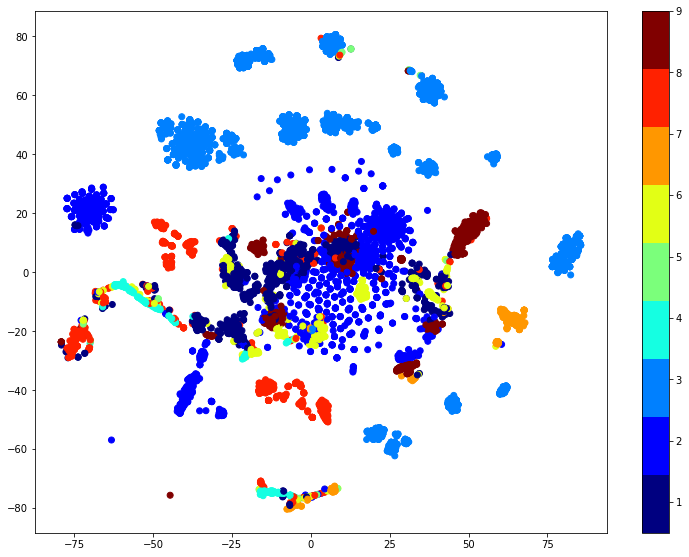

In [ ]:
#Source and credits for the code below: https://www.appliedaicourse.com/
#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

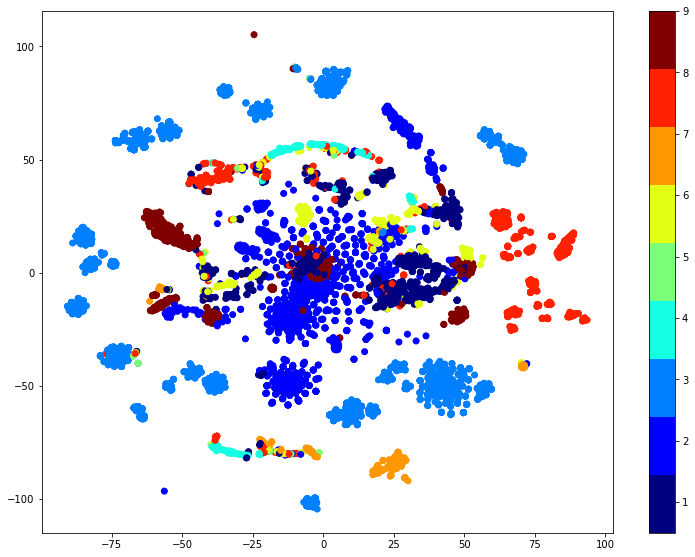

In [ ]:
#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=30, n_jobs=7)
results=xtsne.fit_transform(train_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

### Converting the train,cv and test datasets into sparse matrices

In [ ]:
train_x_byte_sparse= csr_matrix(train_x)
cv_x_byte_sparse= csr_matrix(cv_x)
test_x_byte_sparse= csr_matrix(test_x)

### Checking the class wise distribution of the Test datasets for n_component values of 500,200 and 100 for Truncated SVD 

#### Truncated SVD for n_components=500 scenario and checking the Total variance captured by the 500 components. Also checking the class distribution post SVD.

In [ ]:
#Source:https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
tsvd= TruncatedSVD(n_components= 500)
tsvd.fit(train_x_byte_sparse)
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
tv1= tsvd_var_ratios
s=0
for i in tv1:
    s=s+i
print(s)

0.9991797836418371


In [ ]:
train_x_trun= tsvd.transform(train_x_byte_sparse)
cv_x_trun= tsvd.transform(cv_x_byte_sparse)
test_x_trun= tsvd.transform(test_x_byte_sparse)

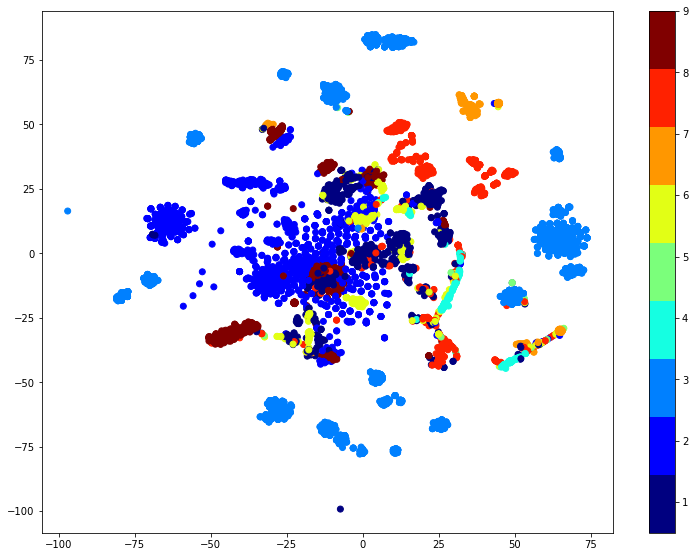

In [ ]:
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#### Truncated SVD for n_components=500 scenario and checking the Total variance captured by the 300 components. Also checking the class distribution post SVD.

In [ ]:
tsvd= TruncatedSVD(n_components= 300)
tsvd.fit(train_x_byte_sparse)
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
tv2= tsvd_var_ratios
s=0
for i in tv1:
    s=s+i
print(s)

0.9991797836418371


In [ ]:
train_x_trun= tsvd.transform(train_x_byte_sparse)
cv_x_trun= tsvd.transform(cv_x_byte_sparse)
test_x_trun= tsvd.transform(test_x_byte_sparse)

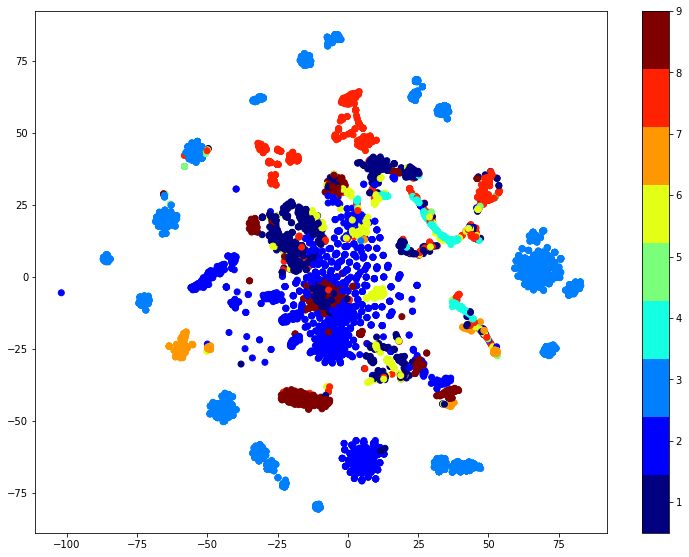

In [ ]:
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#### Truncated SVD for n_components=500 scenario and checking the Total variance captured by the 100 components. Also checking the class distribution post SVD.

In [ ]:
tsvd= TruncatedSVD(n_components= 100)
tsvd.fit(train_x_byte_sparse)
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
tv3= tsvd_var_ratios
s=0
for i in tv3:
    s=s+i
print(s)

0.9894929717727082


In [ ]:
train_x_trun= tsvd.transform(train_x_byte_sparse)
cv_x_trun= tsvd.transform(cv_x_byte_sparse)
test_x_trun= tsvd.transform(test_x_byte_sparse)

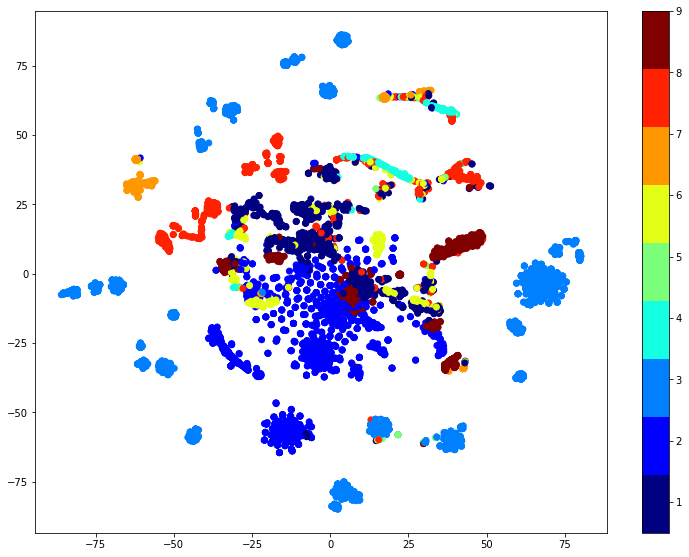

In [ ]:
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#### Truncated SVD for n_components=500 scenario and checking the Total variance captured by the 25 components. Also checking the class distribution post SVD.

In [ ]:
tsvd= TruncatedSVD(n_components= 25)
tsvd.fit(train_x_byte_sparse)
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
tv4= tsvd_var_ratios
s=0
for i in tv4:
    s=s+i
print(s)

0.9678921083526112


In [ ]:
train_x_trun= tsvd.transform(train_x_byte_sparse)
cv_x_trun= tsvd.transform(cv_x_byte_sparse)
test_x_trun= tsvd.transform(test_x_byte_sparse)

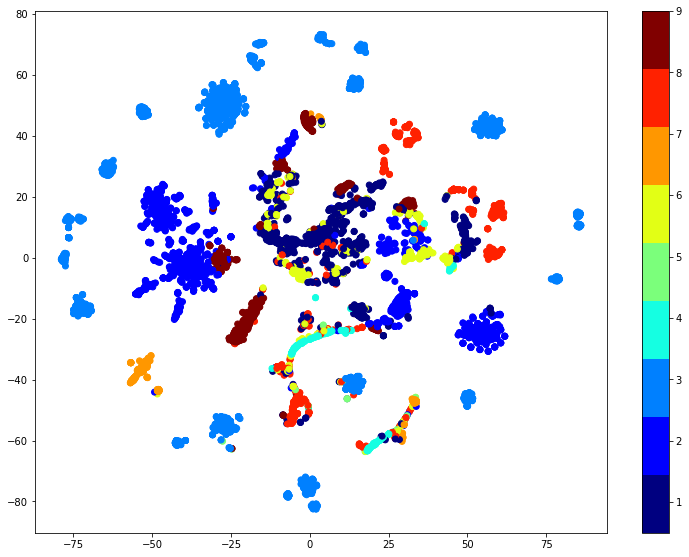

In [ ]:
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#### Experimented with PCA to remove multicollinearity but the class distribution of the data is unaffected

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca= IncrementalPCA(n_components=500,batch_size=1000)

train_pca= pca.fit_transform(train_x_asm_sparse)
cv_pca= pca.transform(cv_x_asm_sparse)
test_pca= pca.transform(test_x_asm_sparse)

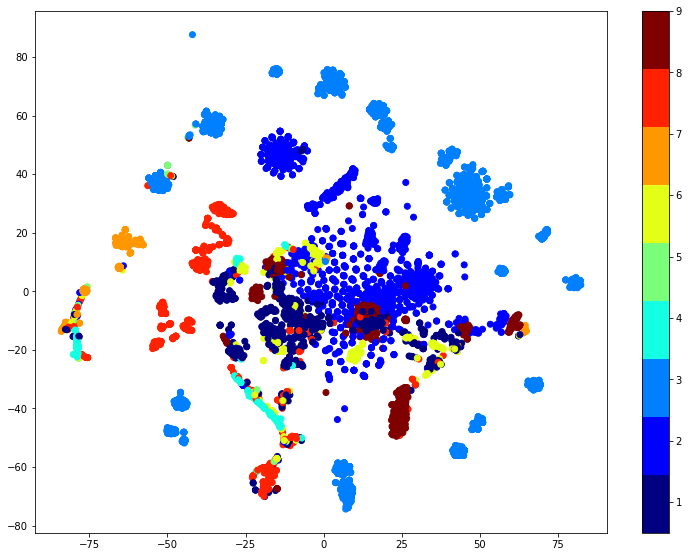

In [ ]:
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_pca)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
train_y= np.array(train_y).ravel()
cv_y= np.array(cv_y).ravel()
test_y= np.array(test_y).ravel()

In [ ]:
print(train_y.shape)
print(cv_y.shape)
print(test_y.shape)

(6955,)
(1739,)
(2174,)


### From a visual standpoint, class distribution seems to be better in the case of Truncated SVD, n_components=100

#### Trying various models like KNN, Logistic Regression, Random Forests and XGBoostClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

100%|██████████| 14/14 [00:26<00:00,  1.86s/it]

log_loss for k =  1 is 0.25345210931751067
log_loss for k =  3 is 0.24680658266365707
log_loss for k =  5 is 0.25760166272504575
log_loss for k =  7 is 0.26300787225830347
log_loss for k =  9 is 0.26921076531124977
log_loss for k =  11 is 0.2747655225594827
log_loss for k =  13 is 0.28305597009911115
log_loss for k =  15 is 0.29284353464002905
log_loss for k =  17 is 0.3012672061917005
log_loss for k =  19 is 0.3103975322884366
log_loss for k =  21 is 0.3206618255849629
log_loss for k =  23 is 0.3306780960574329
log_loss for k =  25 is 0.34039103360245787
log_loss for k =  27 is 0.3496046000625886


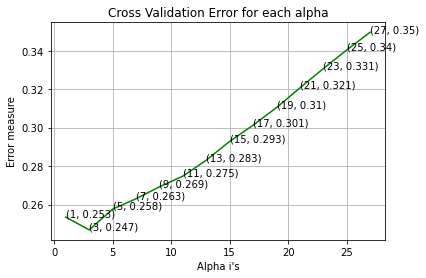

log loss for train data 0.10583536202262156
log loss for cv data 0.24680658266365707
log loss for test data 0.1994918036441319
Number of misclassified points  4.7378104875804965
-------------------------------------------------- Confusion matrix --------------------------------------------------


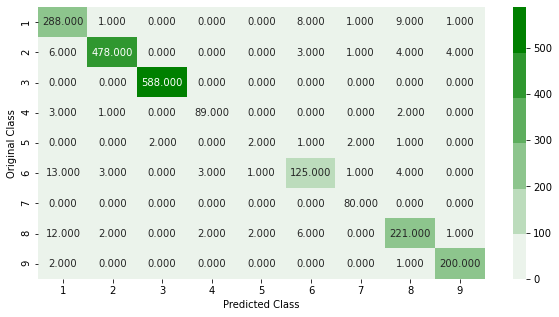

-------------------------------------------------- Precision matrix --------------------------------------------------


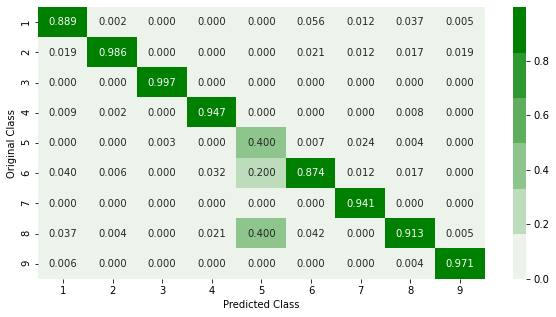

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


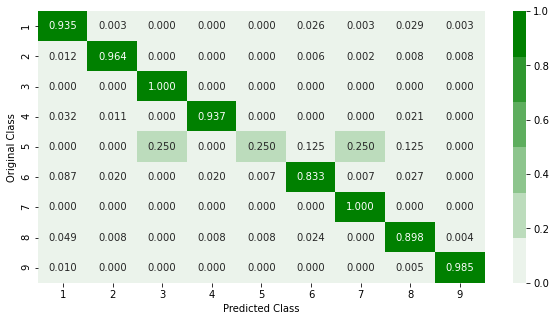

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1,29,2)]
cv_log_error_array=[]
for i in tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[cv_log_error_array.index(best_alpha)])
k_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
pred_y=sig_clf.predict(test_x_trun)


predict_y = sig_clf.predict_proba(train_x_trun)
print ('log loss for train data',log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun)
print ('log loss for cv data',log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun)
print ('log loss for test data',log_loss(test_y, predict_y))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

  0%|          | 0/9 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
 11%|█         | 1/9 [00:28<03:44, 28.11s/it]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
 22%|██▏       | 2/9 [00:55<03:14, 27.75s/it]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
 33%|███▎      | 3/9 [01:23<02:46, 27.71s/it]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

Log Loss for alpha:  1e-05 is: 1.180068468540886
Log Loss for alpha:  0.0001 is: 1.1819233186605518
Log Loss for alpha:  0.001 is: 1.182337536837241
Log Loss for alpha:  0.01 is: 1.1823029262239049
Log Loss for alpha:  0.1 is: 1.1822048572828225
Log Loss for alpha:  1 is: 1.182387917883944
Log Loss for alpha:  10 is: 1.1822617406566347
Log Loss for alpha:  100 is: 1.182762989396114
Log Loss for alpha:  1000 is: 1.1823130387670426
Best Alpha is,  1e-05 and the log loss value is:  1.180068468540886


TypeError: cannot unpack non-iterable numpy.float64 object

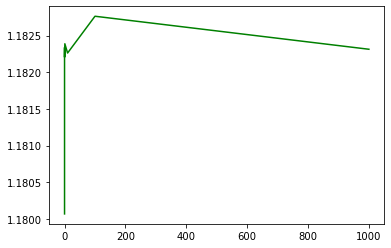

In [ ]:
alpha=[10**x for x in range(-5,4)]
cv_log_loss=[]
for a in tqdm(alpha):
    clf= LogisticRegression(penalty="l1",solver='saga',max_iter=300,C=a,class_weight='balanced',n_jobs=-2)
    clf.fit(train_x_trun,train_y)
    calib_clf= CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_x_trun,train_y)
    predict_cv_y= calib_clf.predict_proba(cv_x_trun)
    cv_log_loss.append(log_loss(cv_y,predict_cv_y, labels= clf.classes_, eps=1e-15))
    
for i in range(len(alpha)):
    print("Log Loss for alpha: ", alpha[i],"is:",cv_log_loss[i])

best_alpha= alpha[cv_log_loss.index(min(cv_log_loss))]
print("Best Alpha is, ",best_alpha,"and the log loss value is: ",min(cv_log_loss))

fig,ax= plt.subplots()
ax.plot(alpha,cv_log_loss,c='g')

for i,loss in enumerate(cv_log_loss):
    ax.annotate(alpha[i],np.round(loss,3))
plt.grid()
plt.title("Log Loss on CV Dataset for each of the Alpha")
plt.xlabel("Alpha Values")
plt.ylabel("Log Loss Values")
plt.show()

best_clf= LogisticRegression(penalty="l1",solver='saga',max_iter=300,C=best_alpha,class_weight='balanced',n_jobs=-2)
best_clf.fit(train_x_trun,train_y)
best_calib_clf= CalibratedClassifier(best_clf, method='sigmoid')
best_calib_clf.fit(train_x_trun,train_y)

train_pred_y= best_calib_clf.predict_proba(train_x_trun,train_y)
print("Log Loss on the Training Data is: ",log_loss(train_y,train_pred_y,labels= clf.classes_, eps=1e-15))
cv_pred_y= best_calib_clf.predict_proba(cv_x_trun,cv_y)
print("Log Loss on the Training Data is: ",log_loss(cv_y,cv_pred_y,labels= clf.classes_, eps=1e-15))
test_pred_y= best_calib_clf.predict_proba(test_x_trun,test_y)
print("Log Loss on the Training Data is: ",log_loss(test_y,test_pred_y,labels= clf.classes_, eps=1e-15))

plot_confusion_matrix(test_y,test_pred_y)


100%|██████████| 6/6 [02:03<00:00, 20.53s/it]

log_loss for c =  10 is 0.13602143796821475
log_loss for c =  50 is 0.12804238627093228
log_loss for c =  100 is 0.12667571234588626
log_loss for c =  500 is 0.12567146767215578
log_loss for c =  1000 is 0.12536272102663223
log_loss for c =  2000 is 0.1252725559416311


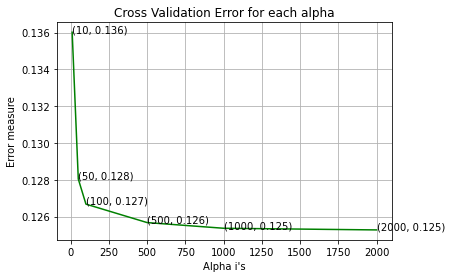

log loss for train data 0.03468419838526458
log loss for cv data 0.1252725559416311
log loss for test data 0.1095877553008742
Number of misclassified points  2.483900643974241
-------------------------------------------------- Confusion matrix --------------------------------------------------


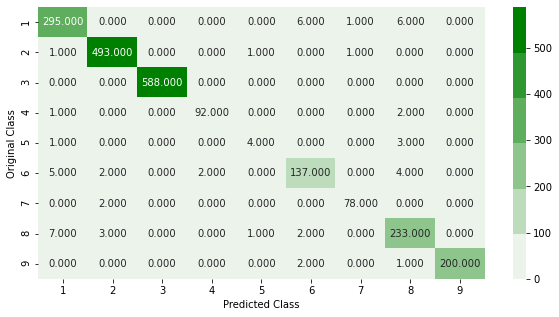

-------------------------------------------------- Precision matrix --------------------------------------------------


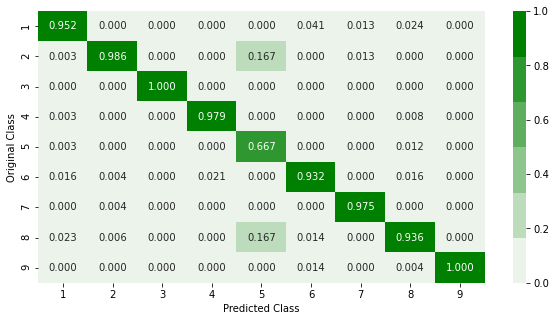

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


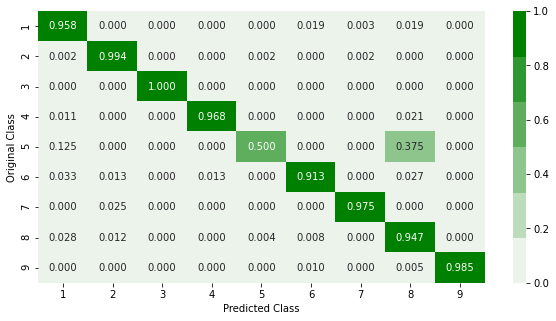

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
predict_y = sig_clf.predict_proba(train_x_trun)
print ('log loss for train data',(log_loss(train_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_x_trun)
print ('log loss for cv data',(log_loss(cv_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_x_trun)
print ('log loss for test data',(log_loss(test_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

In [ ]:
pip install xgboost

     |████████████████████████████████| 166.7 MB 50 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/6 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█▋        | 1/6 [00:04<00:24,  4.88s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|███▎      | 2/6 [00:18<00:40, 10.00s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████     | 3/6 [00:38<00:43, 14.37s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|██████▋   | 4/6 [01:21<00:51, 25.80s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|████████▎ | 5/6 [02:25<00:39, 39.75s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 6/6 [04:07<00:00, 41.23s/it]

log_loss for c =  10 is 0.18860681575878863
log_loss for c =  50 is 0.14169476571805342
log_loss for c =  100 is 0.13754706569830977
log_loss for c =  500 is 0.13496105577750078
log_loss for c =  1000 is 0.13532933162143318
log_loss for c =  2000 is 0.1357642717942976


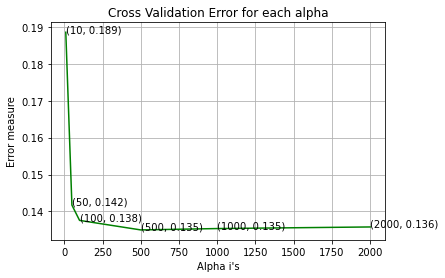

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For values of best alpha =  500 The train log loss is: 0.037286482202210446
For values of best alpha =  500 The cross validation log loss is: 0.13496105577750078
For values of best alpha =  500 The test log loss is: 0.12066517639711462
Number of misclassified points  2.483900643974241
-------------------------------------------------- Confusion matrix --------------------------------------------------


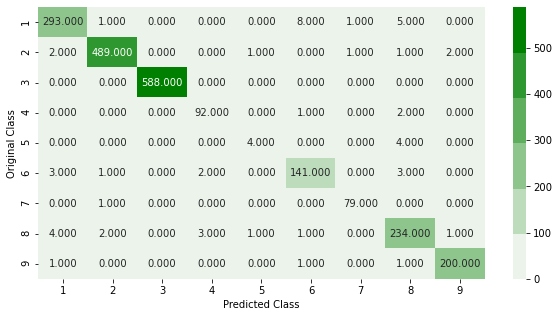

-------------------------------------------------- Precision matrix --------------------------------------------------


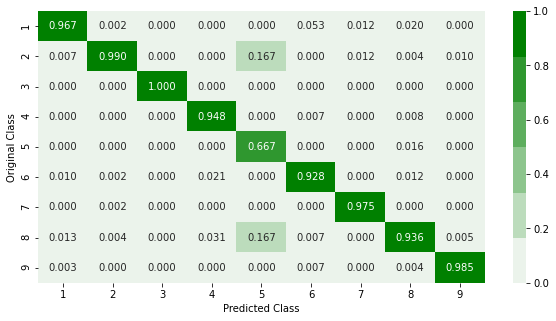

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


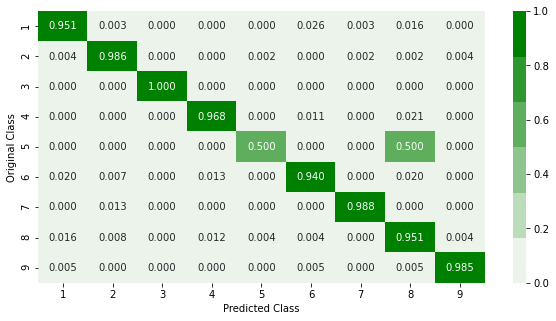

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
    
predict_y = sig_clf.predict_proba(train_x_trun)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y, predict_y))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

In [ ]:
tsvd= TruncatedSVD(n_components= 100)
tsvd.fit(train_x_byte_sparse)
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
tv100= tsvd_var_ratios
s=0
for i in tv100:
    s=s+i
print(s)

0.9894943238941479


In [ ]:
train_x_trun= tsvd.transform(train_x_byte_sparse)
cv_x_trun= tsvd.transform(cv_x_byte_sparse)
test_x_trun= tsvd.transform(test_x_byte_sparse)

100%|██████████| 14/14 [00:29<00:00,  2.10s/it]


log_loss for k =  1 is 0.26920118367108226
log_loss for k =  3 is 0.25143975411682584
log_loss for k =  5 is 0.2539650209274218
log_loss for k =  7 is 0.26137383023676236
log_loss for k =  9 is 0.2725608750162804
log_loss for k =  11 is 0.28051559381129776
log_loss for k =  13 is 0.2926660910145083
log_loss for k =  15 is 0.30745736286106495
log_loss for k =  17 is 0.32092789785899817
log_loss for k =  19 is 0.33367768771498474
log_loss for k =  21 is 0.3461005258977423
log_loss for k =  23 is 0.3568042610082486
log_loss for k =  25 is 0.3673708271009301
log_loss for k =  27 is 0.3773301950846842


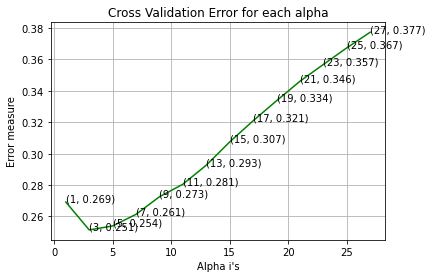

log loss for train data 0.11187395095227395
log loss for cv data 0.25143975411682584
log loss for test data 0.22102853476101644
Number of misclassified points  5.197792088316467
-------------------------------------------------- Confusion matrix --------------------------------------------------


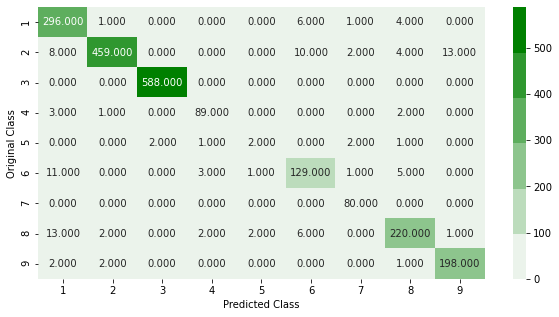

-------------------------------------------------- Precision matrix --------------------------------------------------


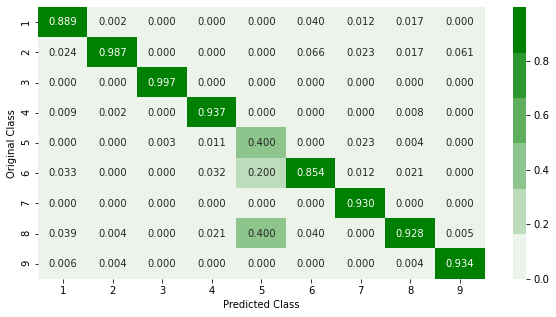

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


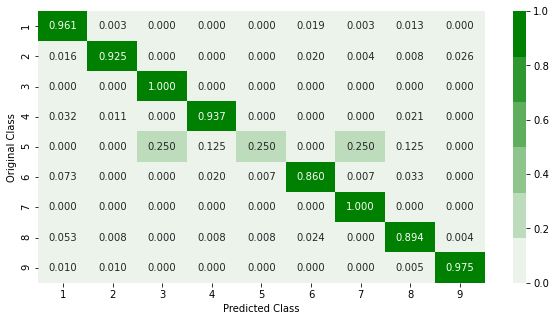

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1,29,2)]
cv_log_error_array=[]
for i in tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[cv_log_error_array.index(best_alpha)])
k_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
pred_y=sig_clf.predict(test_x_trun)


predict_y = sig_clf.predict_proba(train_x_trun)
print ('log loss for train data',log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun)
print ('log loss for cv data',log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun)
print ('log loss for test data',log_loss(test_y, predict_y))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

  0%|          | 0/9 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mea

log_loss for k =  1e-05 is 1.1492658386175245
log_loss for k =  0.0001 is 1.1494596426215433
log_loss for k =  0.001 is 1.149566670225671
log_loss for k =  0.01 is 1.149670364049736
log_loss for k =  0.1 is 1.149446618529829
log_loss for k =  1 is 1.1492203767626197
log_loss for k =  10 is 1.1494322224232538
log_loss for k =  100 is 1.1502012565861979
log_loss for k =  1000 is 1.1493200731202708


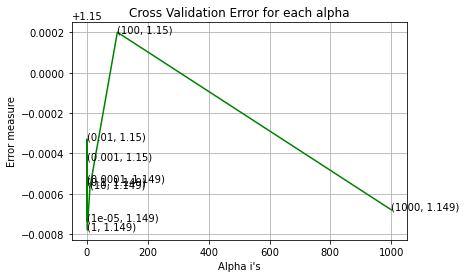

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

log loss for train data 1.14456355173833
log loss for cv data 1.1494394828795327
log loss for test data 1.1627367122118704
Number of misclassified points  40.38638454461822
-------------------------------------------------- Confusion matrix --------------------------------------------------


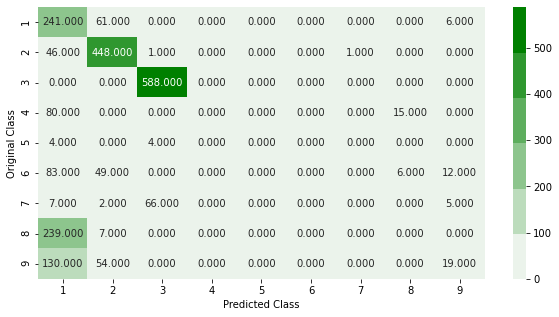

-------------------------------------------------- Precision matrix --------------------------------------------------


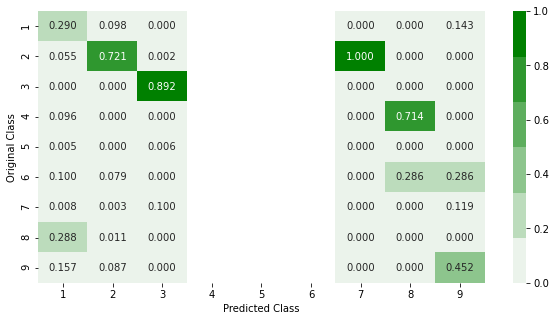

Sum of columns in precision matrix [ 1.  1.  1. nan nan nan  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


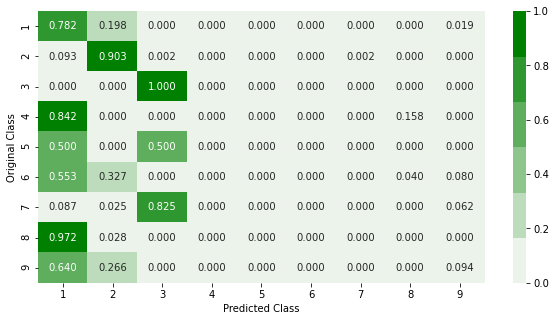

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in tqdm(alpha):
    logisticR=LogisticRegression(penalty='elasticnet',l1_ratio=0.3,C=i,class_weight='balanced',max_iter=500,solver='saga')
    logisticR.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR= LogisticRegression(penalty='elasticnet',l1_ratio=0.3,solver='saga',max_iter=500,C=alpha[cv_log_error_array.index(best_alpha)],class_weight='balanced')

logisticR.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
pred_y=sig_clf.predict(test_x_trun)


predict_y = sig_clf.predict_proba(train_x_trun)
print ('log loss for train data',log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun)
print ('log loss for cv data',log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun)
print ('log loss for test data',log_loss(test_y, predict_y))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

100%|██████████| 6/6 [03:02<00:00, 30.34s/it]

log_loss for c =  10 is 0.1344596450875407
log_loss for c =  50 is 0.11591715588802333
log_loss for c =  100 is 0.11479392348705054
log_loss for c =  500 is 0.11316754347142802
log_loss for c =  1000 is 0.11351621729988536
log_loss for c =  2000 is 0.11350509079855643


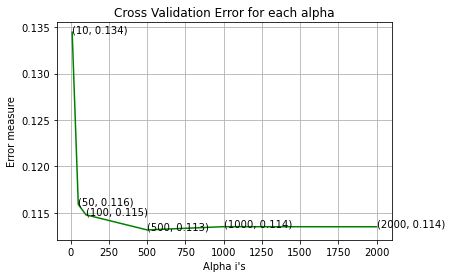

log loss for train data 0.03226628133752897
log loss for cv data 0.11316754347142802
log loss for test data 0.0992065104515673
Number of misclassified points  2.2079116835326587
-------------------------------------------------- Confusion matrix --------------------------------------------------


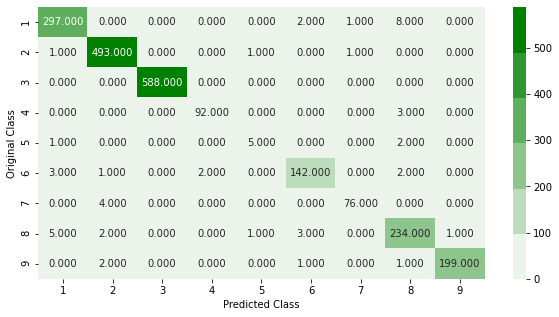

-------------------------------------------------- Precision matrix --------------------------------------------------


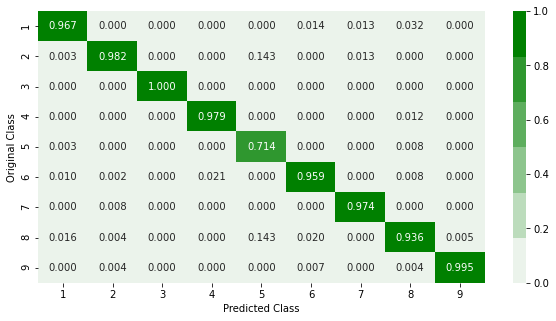

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


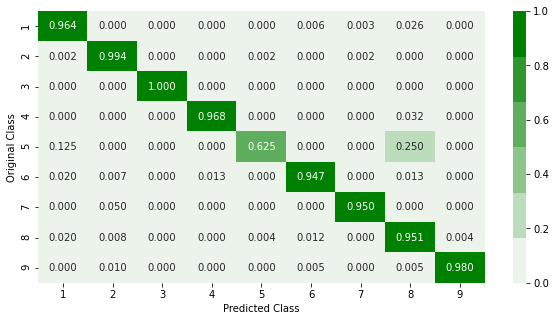

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
predict_y = sig_clf.predict_proba(train_x_trun)
print ('log loss for train data',(log_loss(train_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_x_trun)
print ('log loss for cv data',(log_loss(cv_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_x_trun)
print ('log loss for test data',(log_loss(test_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
    
predict_y = sig_clf.predict_proba(train_x_trun)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y, predict_y))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

In [ ]:
tsvd200= TruncatedSVD(n_components= 200)
tsvd200.fit(train_x_byte_sparse)
tsvd_var_ratios200 = tsvd200.explained_variance_ratio_

In [ ]:
tv200= tsvd_var_ratios200
s=0
for i in tv200:
    s=s+i
print(s)

0.9964285146871592


In [ ]:
train_x_trun200= tsvd200.transform(train_x_byte_sparse)
cv_x_trun200= tsvd200.transform(cv_x_byte_sparse)
test_x_trun200= tsvd200.transform(test_x_byte_sparse)

100%|██████████| 6/6 [03:55<00:00, 39.26s/it]

log_loss for c =  10 is 0.14039682046186525
log_loss for c =  50 is 0.1188244129149459
log_loss for c =  100 is 0.11696521888112435
log_loss for c =  500 is 0.11517820303209016
log_loss for c =  1000 is 0.11449930718060461
log_loss for c =  2000 is 0.1142262127240465


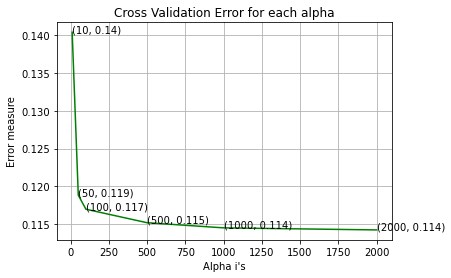

log loss for train data 0.03172805366689989
log loss for cv data 0.1142262127240465
log loss for test data 0.1026055121130812
Number of misclassified points  2.391904323827047
-------------------------------------------------- Confusion matrix --------------------------------------------------


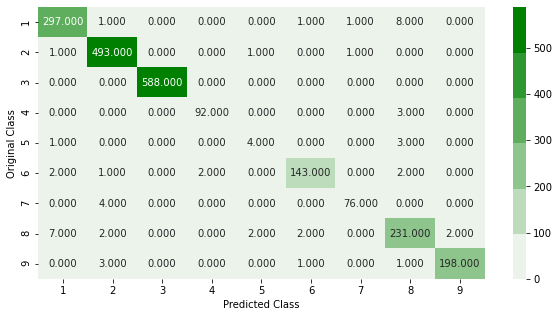

-------------------------------------------------- Precision matrix --------------------------------------------------


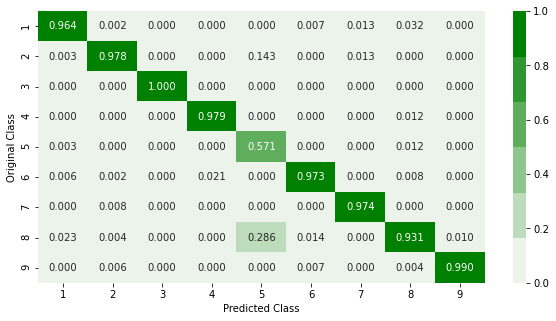

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


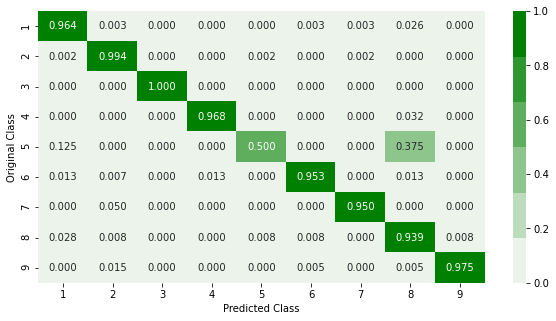

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_x_trun200,train_y)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun200, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun200)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_x_trun200,train_y)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_x_trun200, train_y)
predict_y = sig_clf.predict_proba(train_x_trun200)
print ('log loss for train data',(log_loss(train_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_x_trun200)
print ('log loss for cv data',(log_loss(cv_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_x_trun200)
print ('log loss for test data',(log_loss(test_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun200))

### Using the same pipeline flow of using Truncated SVD for various n_components followed by PCA to remove multicollinearity and trying various models like KNN, Logistic Regression, Random Classifier and XGBoost Classifier to evaluate the Log_loss on ASM Files.

In [ ]:
#Source and credits for the ASM Outputfiles: https://www.appliedaicourse.com/
import pandas as pd
asm_df= pd.read_csv('/home/satya_anuragh/'+'asmoutputfile.csv')

In [ ]:
asm_df.shape

(10868, 52)

In [ ]:
asm_df.columns

Index(['ID', 'HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
       '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE',
       'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc',
       'dec', 'add', 'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror',
       'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx', '.dll', 'std::', ':dword',
       'edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip'],
      dtype='object')

In [ ]:
print(asm_df.shape)
print(asm_df.head())

(10868, 52)
                     ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  :dword  edx  esi  eax  ebx  ecx  edi  ebp  \
0      323        0       3  ...     137   18   66   15   43   83    0   17   
1        0        0       3  ...     130   18   29   48   82   12    0   14   
2      145        0       3  ...      84   13   42   10   67   14    0   11   
3        0        0       3  ...      25    6    8   14    7    2    0    8   
4        0        0       3  ...      18   12    9   18   29    5    0   11   

   esp  eip  
0   48   29  
1    0   20  
2    0    9  
3    0

In [ ]:
asm_size= pd.read_csv('/home/satya_anuragh/'+'asm_with_size.csv')
print(asm_size.shape)
print(asm_size.head())

(10868, 4)
   Unnamed: 0                    ID   size_asm  Class
0           0  01azqd4InC7m9JpocGv5  56.229886      9
1           1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2           2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3           3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4           4  01SuzwMJEIXsK7A8dQbl   0.996723      8


In [ ]:
asm_df= pd.merge(asm_df,asm_size,on='ID', how='left')
print(asm_df.shape)
print(asm_df.head())

(10868, 55)
                     ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   15   43   83    0   17   48   29   
1        0        0       3  ...   48   82   12    0   14    0   20   
2      145        0       3  ...   10   67   14    0   11    0    9   
3        0        0       3  ...   14    7    2    0    8    0    6   
4        0        0       3  ...   18   29    5    0   11    0   11   

   Unnamed: 0  size_asm  Class  
0           3  0.078190      1  
1         438  0.063400      1  
2        11

In [ ]:
asm_fin_df= pd.DataFrame(columns= asm_df.columns, index= range(asm_df.shape[0]))
print(asm_fin_df.shape)
print(asm_fin_df.head())

(10868, 55)
    ID HEADER: .text: .Pav: .idata: .data: .bss: .rdata: .edata: .rsrc:  ...  \
0  NaN     NaN    NaN   NaN     NaN    NaN   NaN     NaN     NaN    NaN  ...   
1  NaN     NaN    NaN   NaN     NaN    NaN   NaN     NaN     NaN    NaN  ...   
2  NaN     NaN    NaN   NaN     NaN    NaN   NaN     NaN     NaN    NaN  ...   
3  NaN     NaN    NaN   NaN     NaN    NaN   NaN     NaN     NaN    NaN  ...   
4  NaN     NaN    NaN   NaN     NaN    NaN   NaN     NaN     NaN    NaN  ...   

   eax  ebx  ecx  edi  ebp  esp  eip Unnamed: 0 size_asm Class  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   NaN  

[5 rows x 55 columns]


In [ ]:
asm_fin_df["ID"]= data_size_byte["ID"]
print(asm_fin_df.head(2))

                     ID HEADER: .text: .Pav: .idata: .data: .bss: .rdata:  \
0  gGrBPR4c8KkNWHuA61UY     NaN    NaN   NaN     NaN    NaN   NaN     NaN   
1  0gkj92oIleU4SYiCWpaM     NaN    NaN   NaN     NaN    NaN   NaN     NaN   

  .edata: .rsrc:  ...  eax  ebx  ecx  edi  ebp  esp  eip Unnamed: 0 size_asm  \
0     NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   
1     NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN      NaN   

  Class  
0   NaN  
1   NaN  

[2 rows x 55 columns]


In [ ]:
asm_fin_df["ID"].iloc[0]

'gGrBPR4c8KkNWHuA61UY'

In [ ]:
for r in tqdm(range(len(asm_fin_df["ID"]))):
    for k in range(len(asm_df["ID"])):
        if asm_fin_df["ID"].iloc[r]== asm_df["ID"].iloc[k]:
            asm_fin_df.iloc[r,:]= asm_df.iloc[k,:]
print(asm_fin_df.head())

100%|██████████| 10868/10868 [36:29<00:00,  4.96it/s]

                     ID HEADER:  .text: .Pav: .idata:   .data: .bss: .rdata:  \
0  gGrBPR4c8KkNWHuA61UY      18   69767     0     265      766     0    1304   
1  0gkj92oIleU4SYiCWpaM      17    4282     0     227      535     0    4272   
2  KakdO56B2GhiC3szw7TI      19  166789     0    1374    16988     0   18539   
3  9NcndSbt1XFgpYO203D5       0    7034     0     320  1735958     0    7384   
4  5102w8Hp4TRkWbIUXSgZ      18   96130     0     436   113834     0   68428   

  .edata: .rsrc:  ...   eax    ebx    ecx edi ebp esp  eip Unnamed: 0  \
0       0      0  ...     5    951     80   0  21   0  103       7934   
1       0      3  ...   194    177    626   0   7   0   86        114   
2       0      3  ...  7653  25085  14290   0  33   0  352      10637   
3       0      0  ...   456    663    408   0   7  18   78       3372   
4       0      3  ...  6939  14834   2295   0  23   0  295       1725   

    size_asm Class  
0   8.421979     9  
1   0.444657     1  
2  10.674423     

In [ ]:
with open('/home/satya_anuragh/'+'asm_fin_df.pkl','wb') as asmfin:
    pickle.dump(asm_fin_df,asmfin)

In [ ]:
with open('/home/satya_anuragh/'+'asm_fin_df.pkl','rb') as asmfin:
    asm_fin_df= pickle.load(asmfin)

In [ ]:
print(asm_fin_df.shape)

(10868, 55)


In [ ]:
asm_fin_df.drop(["ID","Class"], axis=1,inplace=True)

In [ ]:
asm_fin_df_sparse= csr_matrix(asm_fin_df,dtype=float)

In [ ]:
asm_fin_df_csc= asm_fin_df_sparse.tocsc()

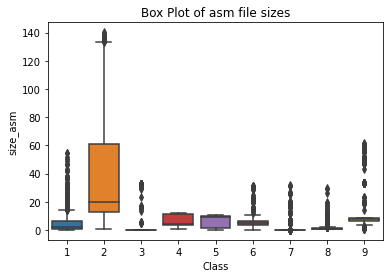

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= sns.boxplot(x="Class",y="size_asm", data= asm_df)
plt.title("Box Plot of asm file sizes")
plt.show()

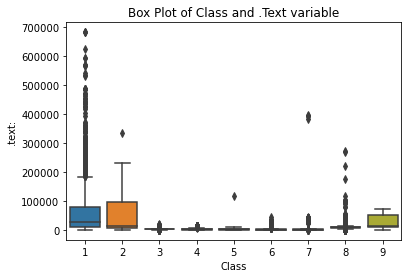

In [ ]:
ax= sns.boxplot(x="Class",y=".text:", data= asm_df)
plt.title("Box Plot of Class and .Text variable")
plt.show()

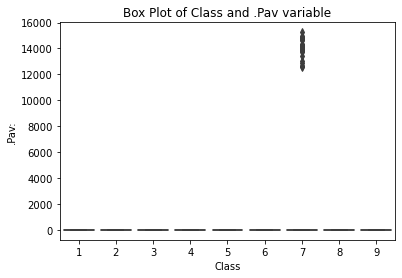

In [ ]:
ax= sns.boxplot(x="Class",y=".Pav:", data= asm_df)
plt.title("Box Plot of Class and .Pav variable")
plt.show()

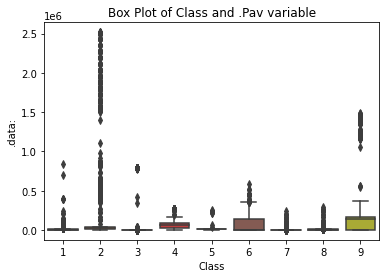

In [ ]:
ax= sns.boxplot(x="Class",y=".data:", data= asm_df)
plt.title("Box Plot of Class and .Pav variable")
plt.show()

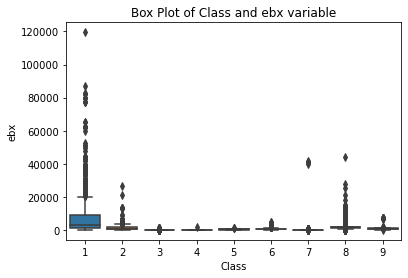

In [ ]:
ax= sns.boxplot(x="Class",y="ebx", data= asm_df)
plt.title("Box Plot of Class and ebx variable")
plt.show()

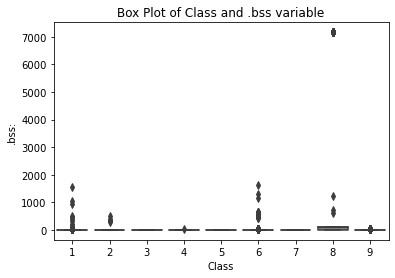

In [ ]:
ax= sns.boxplot(x="Class",y=".bss:", data= asm_df)
plt.title("Box Plot of Class and .bss variable")
plt.show()

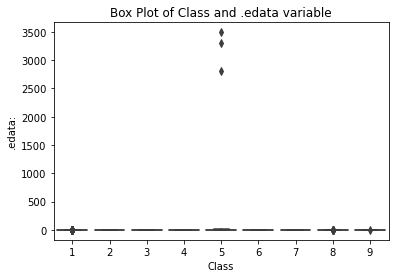

In [ ]:
ax= sns.boxplot(x="Class",y=".edata:", data= asm_df)
plt.title("Box Plot of Class and .edata variable")
plt.show()

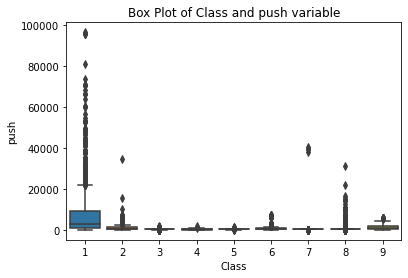

In [ ]:
ax= sns.boxplot(x="Class",y="push", data= asm_df)
plt.title("Box Plot of Class and push variable")
plt.show()

In [ ]:
data_y= asm_df["Class"]

In [ ]:
data_x=asm_df.drop("Class", axis=1)

In [ ]:
data_x.columns

Index(['ID', 'HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
       '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE',
       'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc',
       'dec', 'add', 'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror',
       'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx', '.dll', 'std::', ':dword',
       'edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip',
       'Unnamed: 0_x', 'size_asm_x', 'Unnamed: 0_y', 'size_asm_y'],
      dtype='object')

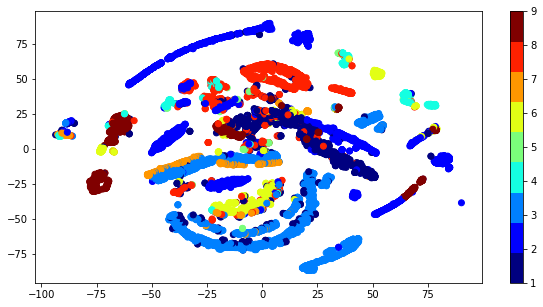

In [ ]:
from sklearn.manifold import TSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE
xtsne= TSNE(perplexity=50, n_jobs=7)
results= xtsne.fit_transform(data_x.drop("ID",axis=1).fillna(0))
vis_x= results[:,0]
vis_y= results[:,1 ]
plt.figure(figsize=(10,5))
plt.scatter(x=vis_x, y=vis_y,c= data_y,cmap= plt.cm.get_cmap("jet",9))
plt.colorbar(ticks= range(10))
plt.show()

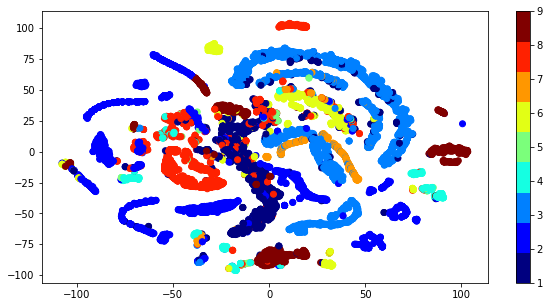

In [ ]:
from sklearn.manifold import TSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE
xtsne= TSNE(perplexity=30, n_jobs=7)
results= xtsne.fit_transform(data_x.drop("ID",axis=1).fillna(0))
vis_x= results[:,0]
vis_y= results[:,1 ]
plt.figure(figsize=(10,5))
plt.scatter(x=vis_x, y=vis_y,c= data_y,cmap= plt.cm.get_cmap("jet",9))
plt.colorbar(ticks= range(10))
plt.show()

In [ ]:
asm_y= asm_df["Class"]

In [ ]:
asm_df.drop(['ID','Class','.BSS:','rtn','.CODE'],axis=1,inplace= True)

In [ ]:
train_x_asm,test_x_asm,train_y_asm,test_y_asm= train_test_split(asm_df,asm_y,test_size=0.2,stratify= asm_y)
train_x_asm,cv_x_asm,train_y_asm,cv_y_asm= train_test_split(train_x_asm,train_y_asm, test_size=0.2, stratify= train_y_asm)

In [ ]:
print(train_x_asm.shape)
print(train_y_asm.shape)
print(cv_x_asm.shape)
print(cv_y_asm.shape)
print(test_x_asm.shape)
print(test_y_asm.shape)

(6955, 50)
(6955,)
(1739, 50)
(1739,)
(2174, 50)
(2174,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(train_x_asm)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.transform(train_x_asm)
scaler.transform(cv_x_asm)
scaler.transform(test_x_asm)

array([[1.01694915e-01, 3.62311394e-02, 0.00000000e+00, ...,
        5.41634752e-02, 1.52033867e-01, 5.65477684e-02],
       [9.60451977e-02, 2.58374414e-03, 0.00000000e+00, ...,
        4.26742532e-03, 2.94864716e-01, 1.03207788e-03],
       [9.60451977e-02, 3.81395868e-03, 0.00000000e+00, ...,
        4.26742532e-03, 6.27645868e-01, 1.75071755e-03],
       ...,
       [9.60451977e-02, 2.27252041e-03, 0.00000000e+00, ...,
        5.79932159e-03, 4.52420394e-01, 8.49583655e-02],
       [1.01694915e-01, 1.95263527e-02, 0.00000000e+00, ...,
        1.20363278e-02, 4.64016197e-01, 9.26392189e-03],
       [9.60451977e-02, 1.51941772e-03, 0.00000000e+00, ...,
        3.61089835e-03, 8.70237438e-01, 6.13849615e-04]])

100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


log_loss for k =  1 is 0.41295193630622423
log_loss for k =  3 is 0.39806198065136417
log_loss for k =  5 is 0.43407851230568173
log_loss for k =  7 is 0.4659970881419543
log_loss for k =  9 is 0.4973864110362901
log_loss for k =  11 is 0.5248721840028128
log_loss for k =  13 is 0.5484600567015593
log_loss for k =  15 is 0.5658033306953296
log_loss for k =  17 is 0.5845489804763766
log_loss for k =  19 is 0.6021234450074419


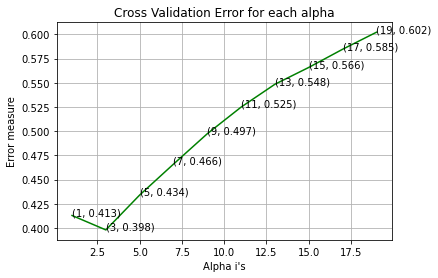

log loss for train data 0.2139783378641061
log loss for cv data 0.39806198065136417
log loss for test data 0.4020850105178097
Number of misclassified points  10.441582336706531
-------------------------------------------------- Confusion matrix --------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


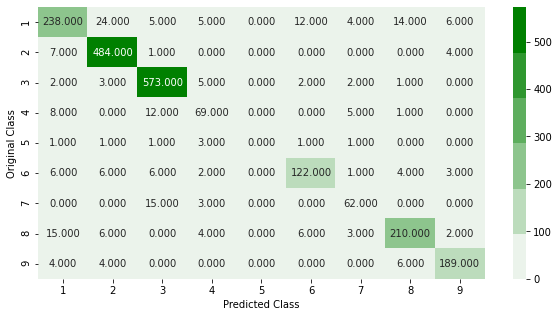

-------------------------------------------------- Precision matrix --------------------------------------------------


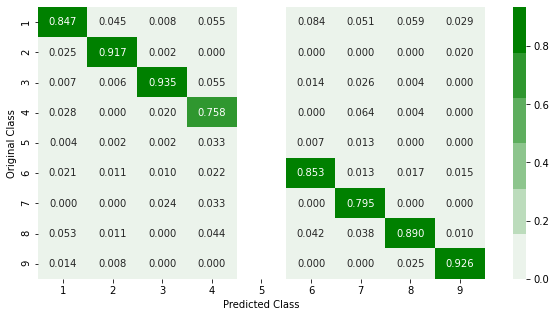

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


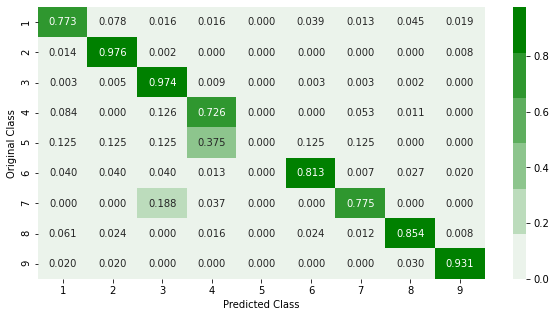

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_x_asm.iloc[:,26:],train_y_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_x_asm.iloc[:,26:], train_y_asm)
    predict_y = sig_clf.predict_proba(cv_x_asm.iloc[:,26:])
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[cv_log_error_array.index(best_alpha)])
k_cfl.fit(train_x_asm.iloc[:,26:],train_y_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_x_asm.iloc[:,26:], train_y_asm)
pred_y=sig_clf.predict(test_x_asm.iloc[:,26:])


predict_y = sig_clf.predict_proba(train_x_asm.iloc[:,26:])
print ('log loss for train data',log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_x_asm.iloc[:,26:])
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_x_asm.iloc[:,26:])
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_x_asm.iloc[:,26:]))

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which mea

log_loss for k =  1e-05 is 1.5320199994651014
log_loss for k =  0.0001 is 1.480341745016382
log_loss for k =  0.001 is 1.4754970911646947
log_loss for k =  0.01 is 1.4746969428107493
log_loss for k =  0.1 is 1.4746331315687402
log_loss for k =  1 is 1.4745985385613798
log_loss for k =  10 is 1.4745889042101024
log_loss for k =  100 is 1.4745984879511496
log_loss for k =  1000 is 1.4745802486268453


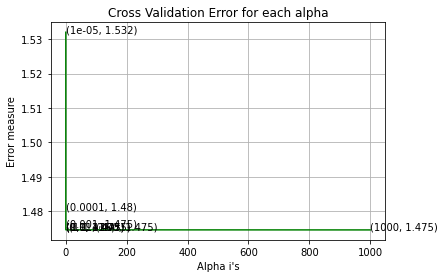

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

log loss for train data 1.474050474831815
log loss for cv data 1.4745926123470539
log loss for test data 1.464752410892065
Number of misclassified points  47.05611775528979
-------------------------------------------------- Confusion matrix --------------------------------------------------


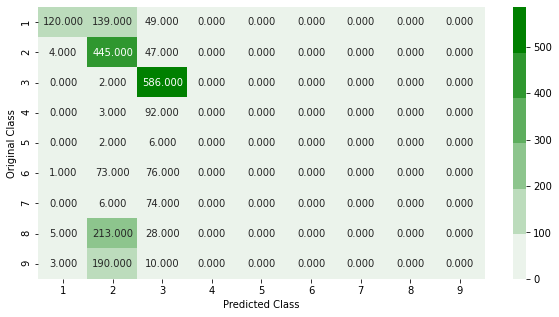

-------------------------------------------------- Precision matrix --------------------------------------------------


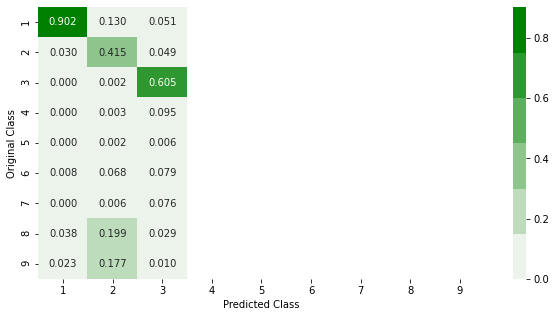

Sum of columns in precision matrix [ 1.  1.  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


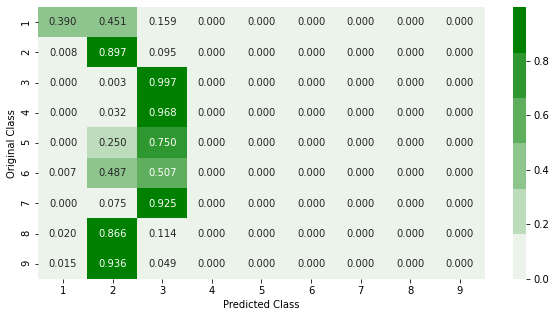

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in tqdm(alpha):
    logisticR=LogisticRegression(penalty='elasticnet',l1_ratio=0.3,C=i,class_weight='balanced',max_iter=500,solver='saga')
    logisticR.fit(train_x_asm.iloc[:,26:],train_y_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(train_x_asm.iloc[:,26:], train_y_asm)
    predict_y = sig_clf.predict_proba(cv_x_asm.iloc[:,26:])
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR= LogisticRegression(penalty='elasticnet',l1_ratio=0.3,solver='saga',max_iter=500,C=alpha[cv_log_error_array.index(best_alpha)],class_weight='balanced')

logisticR.fit(train_x_asm.iloc[:,26:],train_y_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(train_x_asm.iloc[:,26:], train_y_asm)
pred_y=sig_clf.predict(test_x_asm.iloc[:,26:])


predict_y = sig_clf.predict_proba(train_x_asm.iloc[:,26:])
print ('log loss for train data',log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_x_asm.iloc[:,26:])
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_x_asm.iloc[:,26:])
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_x_asm.iloc[:,26:]))

In [ ]:
#Source:https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-pandas-columns-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X):
    cols = X.columns
    variables = np.arange(X.shape[1])
    c = X[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
    return vif

In [ ]:
v= calculate_vif_(train_x_asm)

In [ ]:
print(len(v))
print(type(v))
print(v[:10])

50
<class 'list'>
[93.22233389110002, 79.96247037738493, 76.54957196953809, 74.18909576871724, 56.16553737665226, 50.594880139685735, 47.29044587365026, 46.949143360136105, 41.83260625878088, 41.82905024614264]


In [ ]:
print(v[:26])

[93.22233389110002, 79.96247037738493, 76.54957196953809, 74.18909576871724, 56.16553737665226, 50.594880139685735, 47.29044587365026, 46.949143360136105, 41.83260625878088, 41.82905024614264, 37.69471132467472, 37.56290623010903, 37.07959595999676, 32.60357674927577, 30.983236686188683, 29.63302491300511, 23.760324113666098, 22.480691576063197, 19.650068490363175, 18.19756217818231, 16.64337113001922, 15.047260557836369, 14.755694127448225, 12.39958151174409, 11.71709274498965, 10.219575640023685]


In [ ]:
from sklearn.decomposition import IncrementalPCA
pca= IncrementalPCA(n_components=30,batch_size=500)

train_x_asm_sparse= csr_matrix(train_x_asm)
cv_x_asm_sparse= csr_matrix(cv_x_asm)
test_x_asm_sparse= csr_matrix(test_x_asm)

train_pca= pca.fit_transform(train_x_asm_sparse)
cv_pca= pca.transform(cv_x_asm_sparse)
test_pca= pca.transform(test_x_asm_sparse)

In [ ]:
train_pca.shape

(6955, 30)

100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


log_loss for k =  1 is 0.2451540914694078
log_loss for k =  3 is 0.24256830693562145
log_loss for k =  5 is 0.2621419266019082
log_loss for k =  7 is 0.2790300278240952
log_loss for k =  9 is 0.2915404365446932
log_loss for k =  11 is 0.3014620215267476
log_loss for k =  13 is 0.3141278618479233
log_loss for k =  15 is 0.3231636696889234
log_loss for k =  17 is 0.33065442370342846
log_loss for k =  19 is 0.3369306584859088


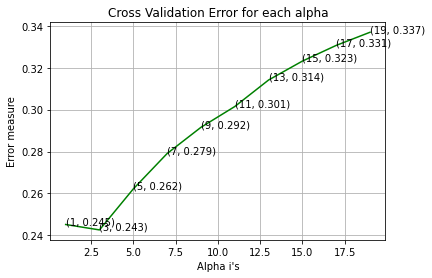

log loss for train data 0.11758858801330678
log loss for cv data 0.24256830693562145
log loss for test data 0.23598214968452672
Number of misclassified points  5.565777368905244
-------------------------------------------------- Confusion matrix --------------------------------------------------


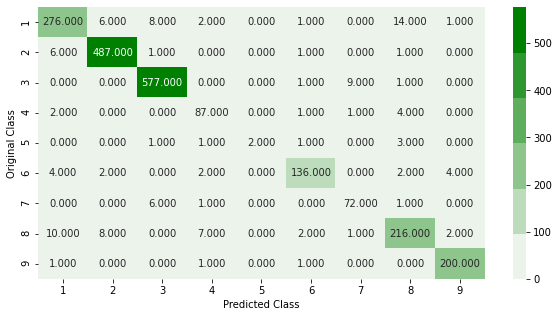

-------------------------------------------------- Precision matrix --------------------------------------------------


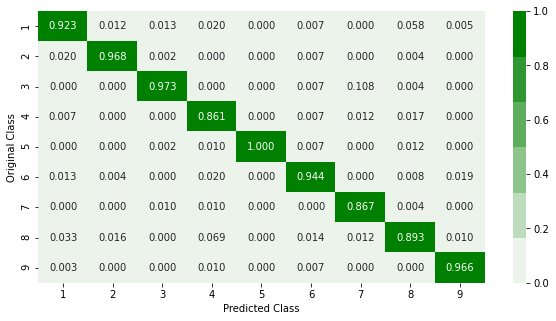

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


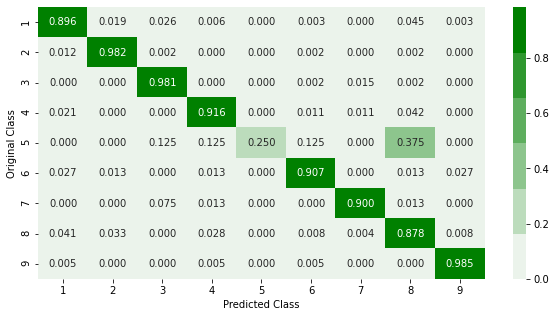

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[cv_log_error_array.index(best_alpha)])
k_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
pred_y=sig_clf.predict(test_pca)


predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which mea

log_loss for k =  1e-05 is 1.591064943368001
log_loss for k =  0.0001 is 1.598005906320132
log_loss for k =  0.001 is 1.5987275542427102
log_loss for k =  0.01 is 1.598801275583124
log_loss for k =  0.1 is 1.5988085647516173
log_loss for k =  1 is 1.598809379396522
log_loss for k =  10 is 1.5988102835660558
log_loss for k =  100 is 1.5988102640591069
log_loss for k =  1000 is 1.5988086943672584


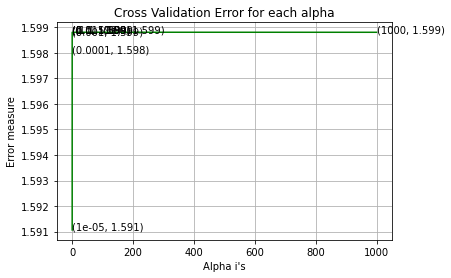

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

log loss for train data 1.5904396364035536
log loss for cv data 1.5910695834869828
log loss for test data 1.594236234938989
Number of misclassified points  49.31002759889604
-------------------------------------------------- Confusion matrix --------------------------------------------------


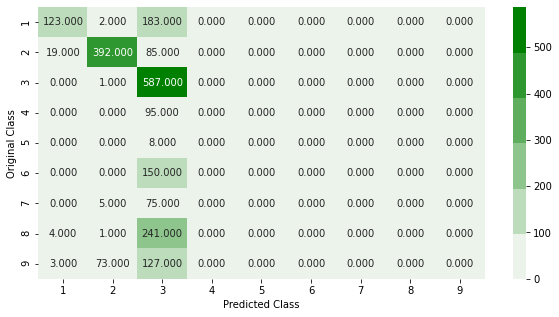

-------------------------------------------------- Precision matrix --------------------------------------------------


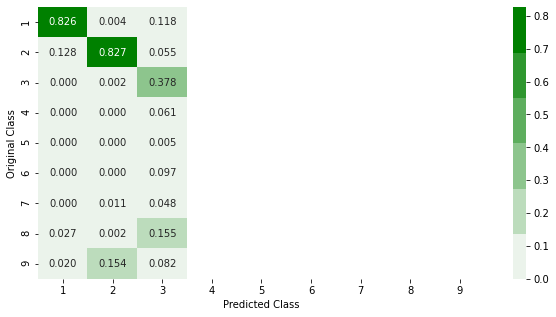

Sum of columns in precision matrix [ 1.  1.  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


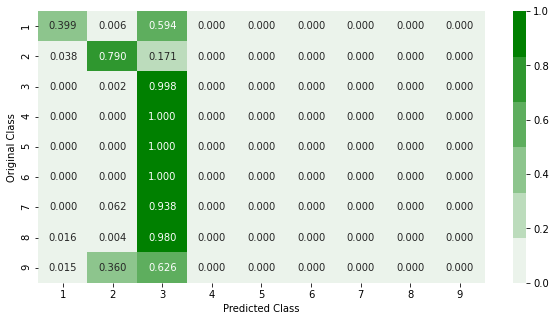

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in tqdm(alpha):
    logisticR=LogisticRegression(penalty='elasticnet',l1_ratio=0.3,C=i,class_weight='balanced',max_iter=500,solver='saga')
    logisticR.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR= LogisticRegression(penalty='elasticnet',l1_ratio=0.3,solver='saga',max_iter=500,C=alpha[cv_log_error_array.index(best_alpha)],class_weight='balanced')

logisticR.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
pred_y=sig_clf.predict(test_pca)


predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

100%|██████████| 6/6 [03:44<00:00, 37.41s/it]


log_loss for c =  10 is 0.0954773912644623
log_loss for c =  50 is 0.09110957723444447
log_loss for c =  100 is 0.09205439003411336
log_loss for c =  500 is 0.09158131834731435
log_loss for c =  1000 is 0.09133195055113472
log_loss for c =  2000 is 0.09084978911000069


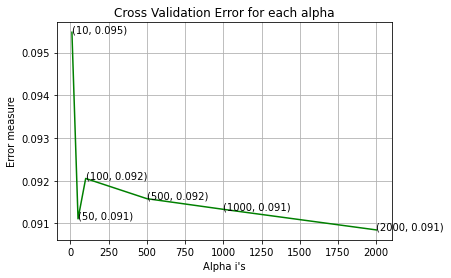

log loss for train data 0.023234905656906207
log loss for cv data 0.09084978911000069
log loss for test data 0.08774155519061619
Number of misclassified points  1.9319227230910765
-------------------------------------------------- Confusion matrix --------------------------------------------------


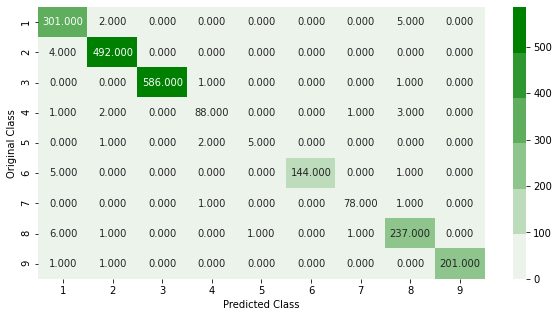

-------------------------------------------------- Precision matrix --------------------------------------------------


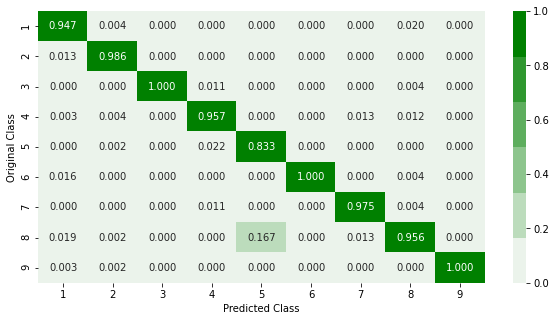

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


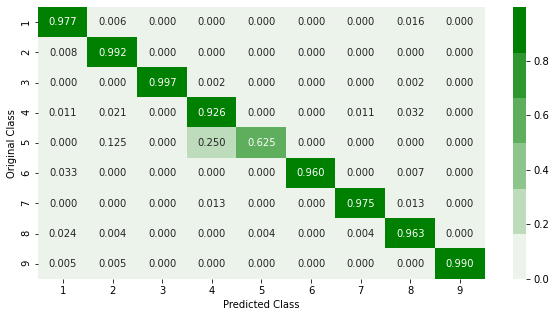

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',(log_loss(train_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',(log_loss(cv_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',(log_loss(test_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

100%|██████████| 6/6 [08:54<00:00, 89.12s/it] 


log_loss for c =  10 is 0.28056901846441074
log_loss for c =  50 is 0.139165493328744
log_loss for c =  100 is 0.11211363036367762
log_loss for c =  500 is 0.0966946131126102
log_loss for c =  1000 is 0.09736782798497827
log_loss for c =  2000 is 0.09731579351269182


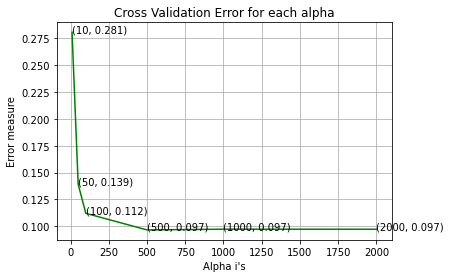

For values of best alpha =  500 The train log loss is: 0.024190479374979788
For values of best alpha =  500 The cross validation log loss is: 0.0966946131126102
For values of best alpha =  500 The test log loss is: 0.10472362974165082
Number of misclassified points  2.2079116835326587
-------------------------------------------------- Confusion matrix --------------------------------------------------


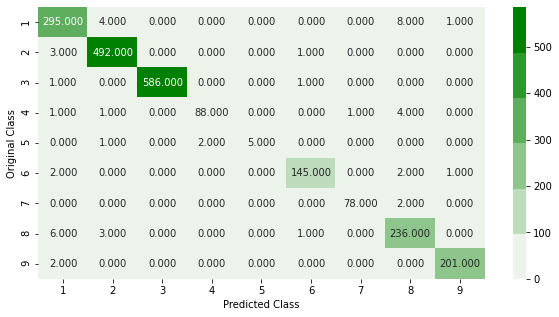

-------------------------------------------------- Precision matrix --------------------------------------------------


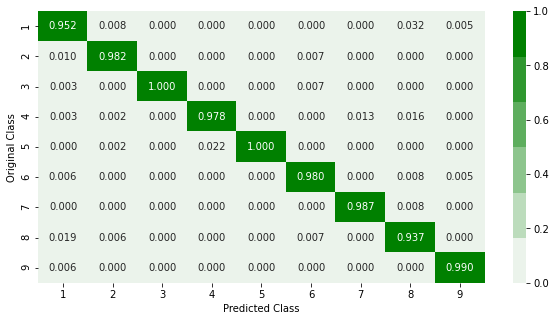

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


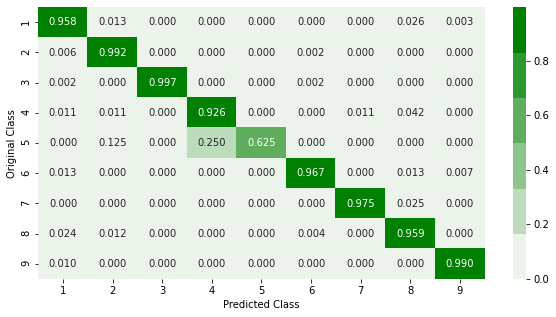

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
    
predict_y = sig_clf.predict_proba(train_pca)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

In [ ]:
pca= IncrementalPCA(n_components=40,batch_size=500)

train_x_asm_sparse= csr_matrix(train_x_asm)
cv_x_asm_sparse= csr_matrix(cv_x_asm)
test_x_asm_sparse= csr_matrix(test_x_asm)

train_pca= pca.fit_transform(train_x_asm_sparse)
cv_pca= pca.transform(cv_x_asm_sparse)
test_pca= pca.transform(test_x_asm_sparse)

100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


log_loss for k =  1 is 0.24400728560582105
log_loss for k =  3 is 0.2411120884822838
log_loss for k =  5 is 0.26240349652719885
log_loss for k =  7 is 0.27818700798225304
log_loss for k =  9 is 0.291074327418008
log_loss for k =  11 is 0.3010819012883549
log_loss for k =  13 is 0.3136195993167493
log_loss for k =  15 is 0.32316833883200924
log_loss for k =  17 is 0.3302618596835335
log_loss for k =  19 is 0.33640211430706907


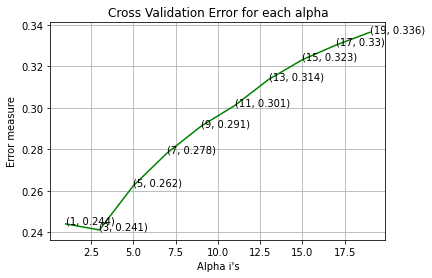

log loss for train data 0.11736523163754327
log loss for cv data 0.2411120884822838
log loss for test data 0.23371337623660254
Number of misclassified points  5.427782888684453
-------------------------------------------------- Confusion matrix --------------------------------------------------


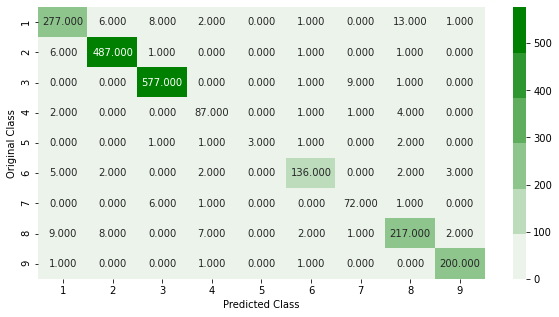

-------------------------------------------------- Precision matrix --------------------------------------------------


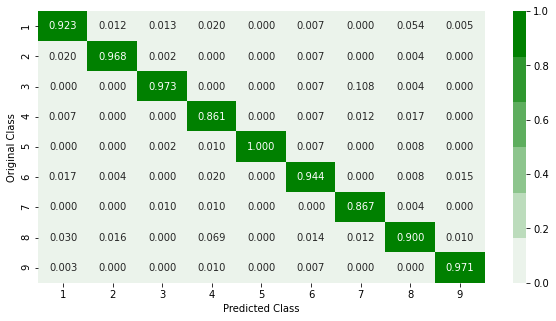

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


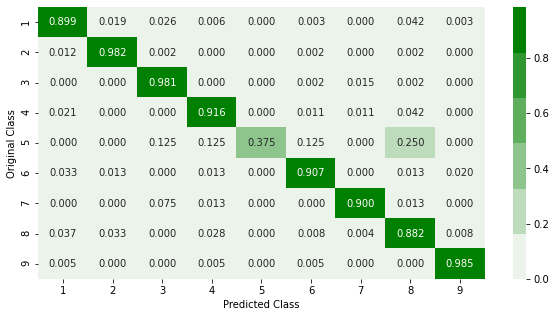

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[cv_log_error_array.index(best_alpha)])
k_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
pred_y=sig_clf.predict(test_pca)


predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which mea

log_loss for k =  1e-05 is 1.5910511031388983
log_loss for k =  0.0001 is 1.5979379435764747
log_loss for k =  0.001 is 1.598654562243524
log_loss for k =  0.01 is 1.5987285005580996
log_loss for k =  0.1 is 1.5987348072288015
log_loss for k =  1 is 1.598734682270249
log_loss for k =  10 is 1.5987360193724531
log_loss for k =  100 is 1.5987368759055978
log_loss for k =  1000 is 1.598735091120901


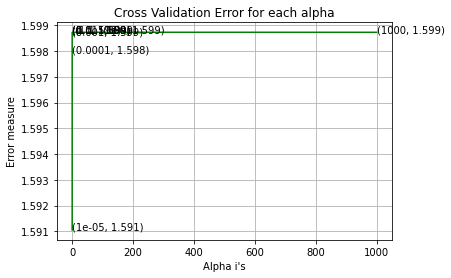

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

ValueError: ignored

In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in tqdm(alpha):
    logisticR=LogisticRegression(penalty='elasticnet',l1_ratio=0.3,C=i,class_weight='balanced',max_iter=500,solver='saga')
    logisticR.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR= LogisticRegression(penalty='elasticnet',l1_ratio=0.3,solver='saga',max_iter=500,C=alpha[cv_log_error_array.index(best_alpha)],class_weight='balanced')

logisticR.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
pred_y=sig_clf.predict(test_pca)


predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',log_loss(train_pca, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

100%|██████████| 6/6 [04:09<00:00, 41.59s/it]


log_loss for c =  10 is 0.09735882561428522
log_loss for c =  50 is 0.08425616647959848
log_loss for c =  100 is 0.0850097321413217
log_loss for c =  500 is 0.0855780855081178
log_loss for c =  1000 is 0.08578124104052377
log_loss for c =  2000 is 0.08583471965271823


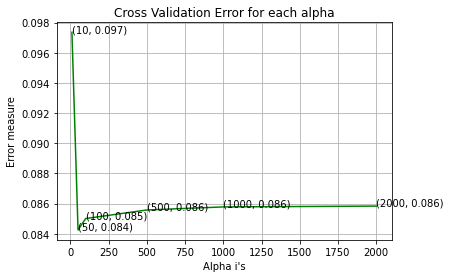

log loss for train data 0.022909258964477316
log loss for cv data 0.08425616647959848
log loss for test data 0.08030504919598978
Number of misclassified points  1.9319227230910765
-------------------------------------------------- Confusion matrix --------------------------------------------------


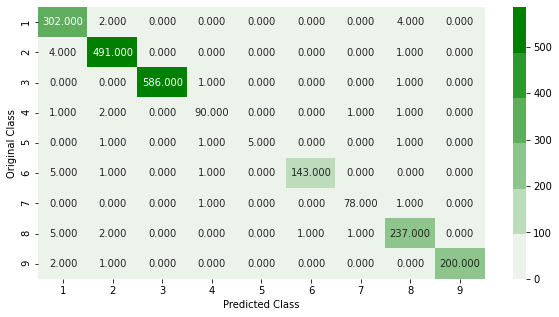

-------------------------------------------------- Precision matrix --------------------------------------------------


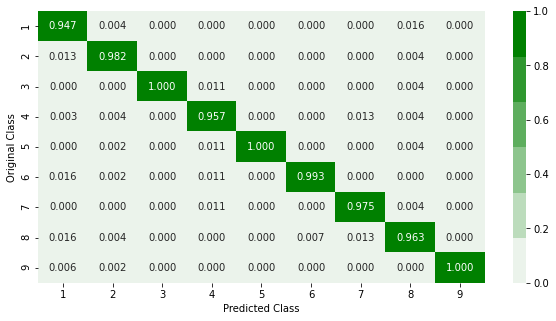

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


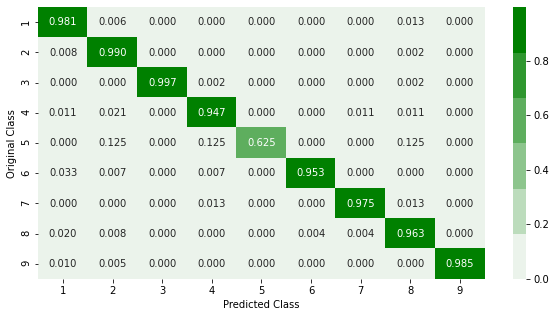

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',(log_loss(train_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',(log_loss(cv_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',(log_loss(test_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

100%|██████████| 2/2 [18:30<00:00, 555.01s/it]


log_loss for c =  6000 is 0.0879157300722398
log_loss for c =  9000 is 0.08805164775278254


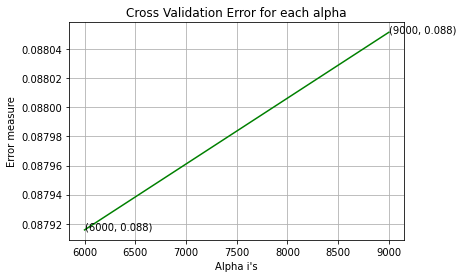

In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[6000,9000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',(log_loss(train_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',(log_loss(cv_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',(log_loss(test_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

100%|██████████| 6/6 [10:52<00:00, 108.69s/it]


log_loss for c =  10 is 0.2695118764680619
log_loss for c =  50 is 0.13467011495242306
log_loss for c =  100 is 0.10984124946485768
log_loss for c =  500 is 0.09825835250495209
log_loss for c =  1000 is 0.09674283661836235
log_loss for c =  2000 is 0.0971604527855645


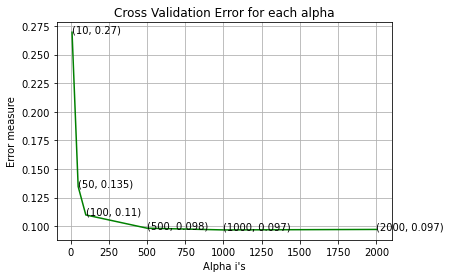

For values of best alpha =  1000 The train log loss is: 0.022594011938467686
For values of best alpha =  1000 The cross validation log loss is: 0.09674283661836235
For values of best alpha =  1000 The test log loss is: 0.10084462053688203


In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
    
predict_y = sig_clf.predict_proba(train_pca)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

In [ ]:
pca= IncrementalPCA(n_components=5,batch_size=500)

train_x_asm_sparse= csr_matrix(train_x_asm)
cv_x_asm_sparse= csr_matrix(cv_x_asm)
test_x_asm_sparse= csr_matrix(test_x_asm)

train_pca= pca.fit_transform(train_x_asm_sparse)
cv_pca= pca.transform(cv_x_asm_sparse)
test_pca= pca.transform(test_x_asm_sparse)

100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


log_loss for k =  1 is 0.18795569739847304
log_loss for k =  3 is 0.18176926883987973
log_loss for k =  5 is 0.193836303370501
log_loss for k =  7 is 0.21030244534486733
log_loss for k =  9 is 0.22279062527551513
log_loss for k =  11 is 0.23197007903143943
log_loss for k =  13 is 0.23792702426248366
log_loss for k =  15 is 0.2444522244613284
log_loss for k =  17 is 0.25040907582384303
log_loss for k =  19 is 0.25545661216250526


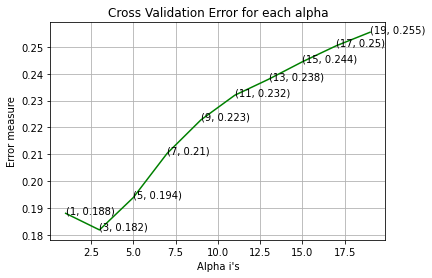

log loss for train data 0.0933843566732686
log loss for cv data 0.18176926883987973
log loss for test data 0.1894796349337545
-------------------------------------------------- Confusion Matrix --------------------------------------------------


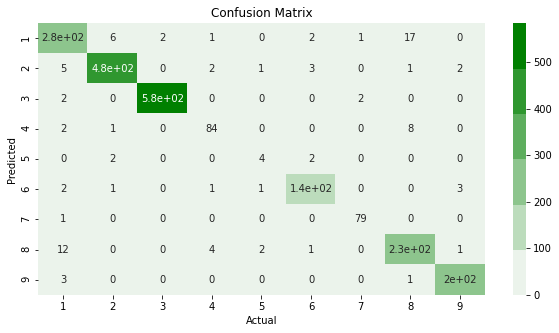

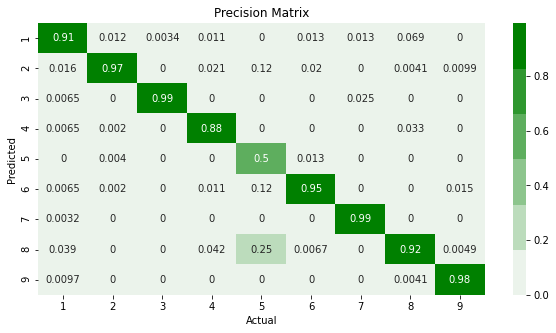

Sum of all elements in each of the columns: [0.99350649 0.99193548 0.99659864 0.96842105 1.         1.
 1.025      1.02845528 1.00985222]


AttributeError: ignored

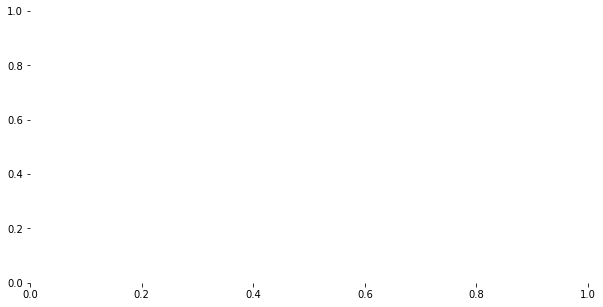

In [ ]:
alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = min(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[cv_log_error_array.index(best_alpha)])
k_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
pred_y=sig_clf.predict(test_pca)


predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',log_loss(train_y_asm, predict_y))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',log_loss(cv_y_asm, predict_y))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',log_loss(test_y_asm, predict_y))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

100%|██████████| 4/4 [09:28<00:00, 142.09s/it]


log_loss for c =  2000 is 0.11915040475534334
log_loss for c =  3000 is 0.11912608810561019
log_loss for c =  4000 is 0.11902893223685788
log_loss for c =  5000 is 0.11893619848577777


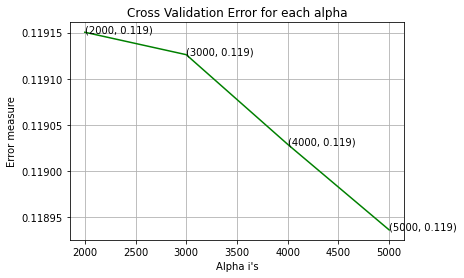

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[2000,3000,4000,5000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_pca,train_y_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_pca, train_y_asm)
    predict_y = sig_clf.predict_proba(cv_pca)
    cv_log_error_array.append(log_loss(cv_y_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_pca,train_y_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_pca, train_y_asm)
predict_y = sig_clf.predict_proba(train_pca)
print ('log loss for train data',(log_loss(train_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_pca)
print ('log loss for cv data',(log_loss(cv_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_pca)
print ('log loss for test data',(log_loss(test_y_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y_asm,sig_clf.predict(test_pca))

### Putting together both the Byte and ASM Files and running the same pipeline as above. Truncated SVD on various options of n_components and using the same on models like Random Forests.

In [ ]:
byteasm_df= concatenate_csc_matrices_by_columns(bigrams_sparse, asm_fin_df_csc)
print(byteasm_df.shape)

(10868, 66494)


In [ ]:
save_npz('/home/satya_anuragh/'+'byteasm_df.npz',byteasm_df)

In [ ]:
byteasm_sparse= load_npz('/home/satya_anuragh/'+'byteasm_df.npz')

In [ ]:
y= data_size_byte["Class"]

from sklearn.model_selection import train_test_split
train_x_byteasm,test_x_byteasm,train_y_byteasm,test_y_byteasm= train_test_split(byteasm_sparse.todense(),y, test_size=0.2, stratify= y)
train_x_byteasm,cv_x_byteasm, train_y_byteasm,cv_y_byteasm= train_test_split(train_x_byteasm,train_y_byteasm,test_size=0.2, stratify=train_y_byteasm)

In [ ]:
with open('/home/satya_anuragh/'+'train_x_byteasm.pkl','wb') as trainbax:
    pickle.dump(train_x_byteasm,trainbax)

with open('/home/satya_anuragh/'+'train_y_byteasm.pkl','wb') as trainbay:
    pickle.dump(train_y_byteasm,trainbay)
    
with open('/home/satya_anuragh/'+'cv_x_byteasm.pkl','wb') as cvbax:
    pickle.dump(cv_x_byteasm,cvbax)
    
with open('/home/satya_anuragh/'+'cv_y_byteasm.pkl','wb') as cvbay:
    pickle.dump(cv_y_byteasm,cvbay)
    
with open('/home/satya_anuragh/'+'test_x_byteasm.pkl','wb') as testbax:
    pickle.dump(test_x_byteasm,testbax)

with open('/home/satya_anuragh/'+'test_y_byteasm.pkl','wb') as testbay:
    pickle.dump(test_y_byteasm,testbay)

In [ ]:
with open('/home/satya_anuragh/'+'train_x_byteasm.pkl','rb') as trainbax:
    train_x_byteasm= pickle.load(trainbax)
    
with open('/home/satya_anuragh/'+'train_y_byteasm.pkl','rb') as trainbay:
    train_y_byteasm= pickle.load(trainbay)

with open('/home/satya_anuragh/'+'cv_x_byteasm.pkl','rb') as cvbax:
    cv_x_byteasm= pickle.load(cvbax)

with open('/home/satya_anuragh/'+'cv_y_byteasm.pkl','rb') as cvbay:
    cv_y_byteasm= pickle.load(cvbay)
    
with open('/home/satya_anuragh/'+'test_x_byteasm.pkl','rb') as testbax:
    test_x_byteasm= pickle.load(testbax)
    
with open('/home/satya_anuragh/'+'test_y_byteasm.pkl','rb') as testbay:
    test_y_byteasm= pickle.load(testbay)

In [ ]:
print(train_x_byteasm.shape)
print(train_y_byteasm.shape)
print(cv_x_byteasm.shape)
print(cv_y_byteasm.shape)
print(test_x_byteasm.shape)
print(test_y_byteasm.shape)

(6955, 66494)
(6955,)
(1739, 66494)
(1739,)
(2174, 66494)
(2174,)


In [ ]:
scaler= StandardScaler()
scaler.fit(train_x_byteasm)
scaler.transform(train_x_byteasm)
scaler.transform(cv_x_byteasm)
scaler.transform(test_x_byteasm)

array([[ 5.85793482e-01,  1.62170225e-02,  4.89336337e-03, ...,
        -3.18119357e-01, -1.73688294e+00,  8.81316342e-01],
       [ 9.48847631e-01,  1.16138017e-01, -1.49247812e-03, ...,
        -3.18119357e-01,  5.41937451e-01, -5.61417889e-01],
       [-6.24387016e-01, -5.51551167e-02, -3.02287648e-02, ...,
         3.46716467e-01,  4.64355174e-01, -4.67062611e-01],
       ...,
       [ 8.27829581e-01,  7.33147339e-02,  1.44721256e-02, ...,
        -3.18119357e-01, -4.74899107e-01, -5.59985803e-01],
       [-6.24387016e-01, -2.66062610e-02, -3.02287648e-02, ...,
        -2.79910402e-01, -5.04787362e-01, -4.89163344e-01],
       [-6.24387016e-01, -5.51551167e-02, -3.02287648e-02, ...,
        -1.49999953e-01,  1.13207149e+00,  2.39535780e+00]])

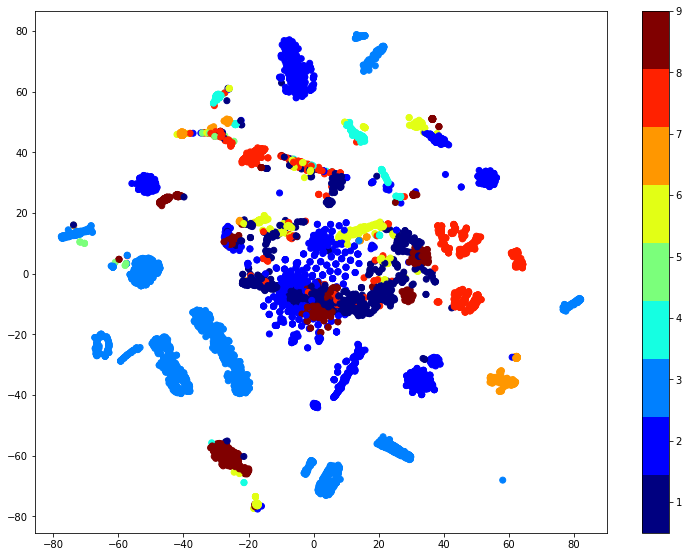

In [ ]:
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_byteasm)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y_byteasm, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
train_x_byteasm_sparse= csr_matrix(train_x_byteasm)
cv_x_byteasm_sparse= csr_matrix(cv_x_byteasm)
test_x_byteasm_sparse= csr_matrix(test_x_byteasm)

In [ ]:
tsvd= TruncatedSVD(n_components= 300)
tsvd.fit(train_x_byteasm_sparse)
tsvd_var_ratios = tsvd.explained_variance_ratio_

tv1= tsvd_var_ratios
s=0
for i in tv1:
    s=s+i
print(s)

train_x_trun= tsvd.transform(train_x_byteasm_sparse)
cv_x_trun= tsvd.transform(cv_x_byteasm_sparse)
test_x_trun= tsvd.transform(test_x_byteasm_sparse)

0.9984360361448894


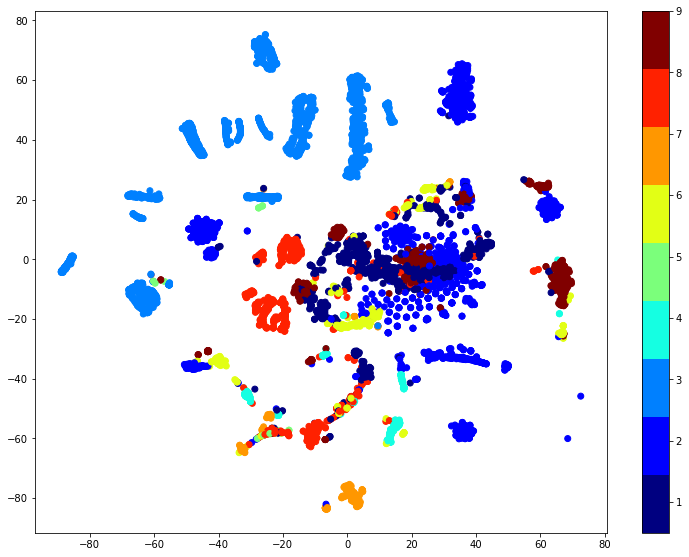

In [ ]:
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y_byteasm, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
tsvd100= TruncatedSVD(n_components= 100)
tsvd100.fit(train_x_byteasm_sparse)
tsvd_var_ratios100 = tsvd100.explained_variance_ratio_

tv100= tsvd_var_ratios100
s=0
for i in tv100:
    s=s+i
print(s)

train_x_trun100= tsvd100.transform(train_x_byteasm_sparse)
cv_x_trun100= tsvd100.transform(cv_x_byteasm_sparse)
test_x_trun100= tsvd100.transform(test_x_byteasm_sparse)

0.991888299169649


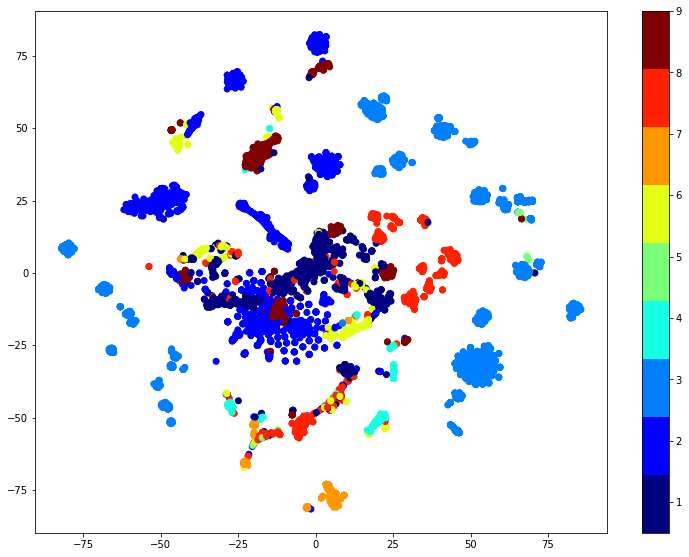

In [ ]:
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun100)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y_byteasm, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
tsvd50= TruncatedSVD(n_components= 40)
tsvd50.fit(train_x_byteasm_sparse)
tsvd_var_ratios50 = tsvd50.explained_variance_ratio_

tv50= tsvd_var_ratios50
s=0
for i in tv50:
    s=s+i
print(s)

train_x_trun50= tsvd50.transform(train_x_byteasm_sparse)
cv_x_trun50= tsvd50.transform(cv_x_byteasm_sparse)
test_x_trun50= tsvd50.transform(test_x_byteasm_sparse)

0.9803022939568385


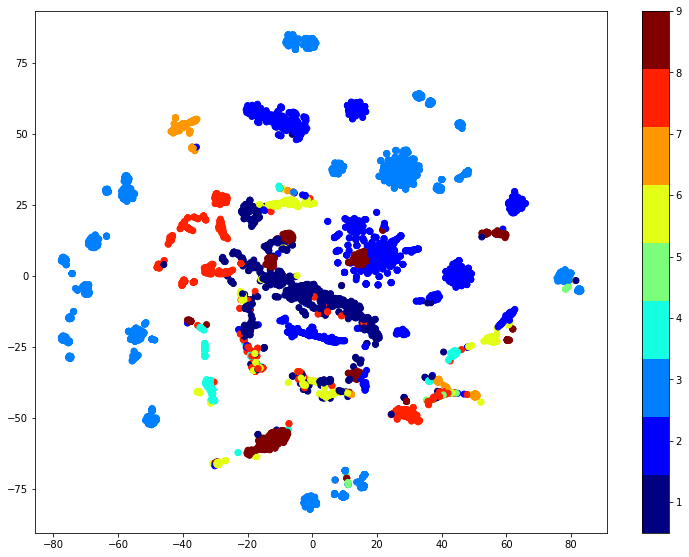

In [ ]:
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun50)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y_byteasm, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
train_y= np.array(train_y_byteasm).ravel()
cv_y= np.array(cv_y_byteasm).ravel()
test_y= np.array(test_y_byteasm).ravel()

100%|██████████| 6/6 [03:02<00:00, 30.44s/it]

log_loss for c =  10 is 0.13114421002359744
log_loss for c =  50 is 0.12038022190888652
log_loss for c =  100 is 0.11701880615961044
log_loss for c =  500 is 0.11686752014863476
log_loss for c =  1000 is 0.11621677478101598
log_loss for c =  2000 is 0.11601887774650373


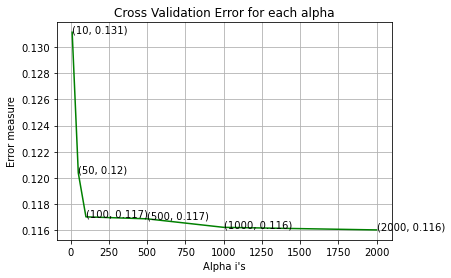

log loss for train data 0.026827593999937473
log loss for cv data 0.11601887774650373
log loss for test data 0.10564780645624555
Number of misclassified points  2.667893284268629
-------------------------------------------------- Confusion matrix --------------------------------------------------


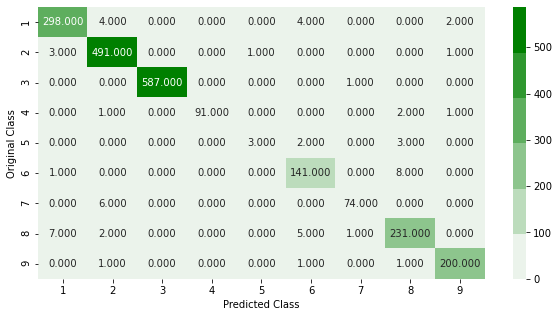

-------------------------------------------------- Precision matrix --------------------------------------------------


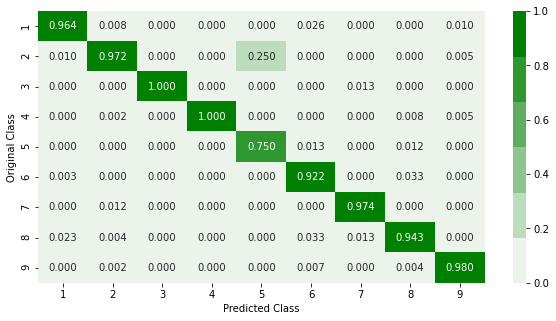

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


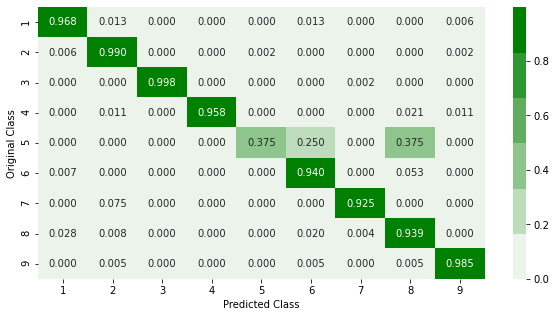

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_x_trun100,train_y_byteasm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun100, train_y_byteasm)
    predict_y = sig_clf.predict_proba(cv_x_trun100)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_x_trun100,train_y_byteasm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_x_trun100, train_y_byteasm)
predict_y = sig_clf.predict_proba(train_x_trun100)
print ('log loss for train data',(log_loss(train_y_byteasm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_x_trun100)
print ('log loss for cv data',(log_loss(cv_y_byteasm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_x_trun100)
print ('log loss for test data',(log_loss(test_y_byteasm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(test_y_byteasm,sig_clf.predict(test_x_trun100))

  0%|          | 0/6 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█▋        | 1/6 [00:11<00:56, 11.40s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|███▎      | 2/6 [00:46<01:41, 25.26s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████     | 3/6 [01:30<01:41, 34.00s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|██████▋   | 4/6 [02:54<01:47, 53.71s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:21:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:21:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:21:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|████████▎ | 5/6 [04:52<01:16, 76.84s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:23:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 6/6 [07:47<00:00, 77.87s/it] 

log_loss for c =  10 is 0.1684510323492075
log_loss for c =  50 is 0.12995888032027728
log_loss for c =  100 is 0.1285023979531686
log_loss for c =  500 is 0.12875813827413854
log_loss for c =  1000 is 0.12825985083447008
log_loss for c =  2000 is 0.12825620300780757


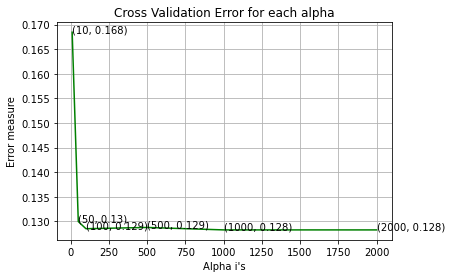

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:26:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:26:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:28:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For values of best alpha =  2000 The train log loss is: 0.027610780861754135
For values of best alpha =  2000 The cross validation log loss is: 0.12825620300780757
For values of best alpha =  2000 The test log loss is: 0.1093360138389585
Number of misclassified points  2.1159153633854646
-------------------------------------------------- Confusion matrix --------------------------------------------------


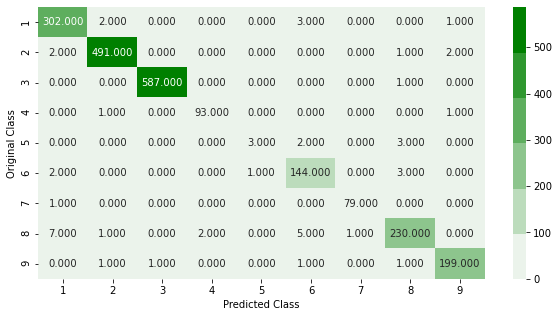

-------------------------------------------------- Precision matrix --------------------------------------------------


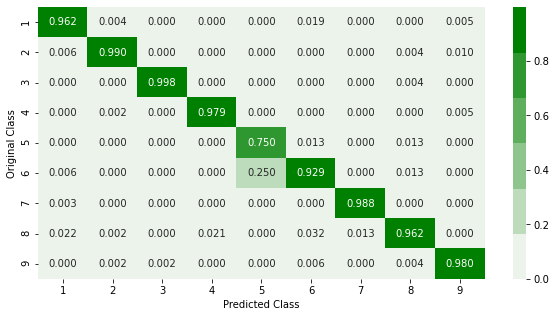

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


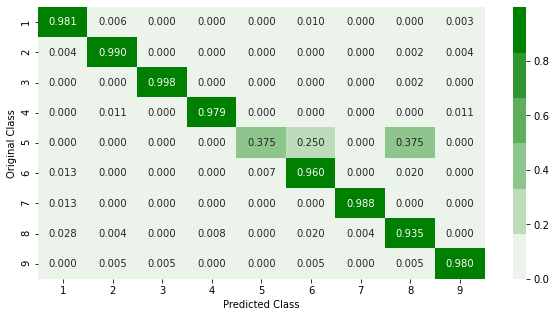

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_x_trun100,train_y_byteasm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun100, train_y_byteasm)
    predict_y = sig_clf.predict_proba(cv_x_trun100)
    cv_log_error_array.append(log_loss(cv_y_byteasm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_x_trun100,train_y_byteasm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_x_trun100, train_y_byteasm)
    
predict_y = sig_clf.predict_proba(train_x_trun100)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y_byteasm, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun100)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y_byteasm, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun100)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y_byteasm, predict_y))
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun100))

## ASM Image Feature Extraction

In [ ]:
os.rename('/home/satya_anuragh/asm_files','asmFiles')

In [ ]:
from multiprocessing import Pool
import os
from csv import writer
import numpy as np
import math
import scipy.misc
import array
import time as tm

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# From Say_No_to_Overfitting
def entropy(p,n):
    p_ratio = float(p)/(p+n)
    n_ratio = float(n)/(p+n)
    return -p_ratio*math.log(p_ratio) - n_ratio * math.log(n_ratio)

def info_gain(p0,n0,p1,n1,p,n):
    return entropy(p,n) - float(p0+n0)/(p+n)*entropy(p0,n0) - float(p1+n1)/(p+n)*entropy(p1,n1)

In [ ]:
#Source fot the Code:https://github.com/be-shekhar/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb
def read_image(filename):
    f = open(filename,'rb')
    ln = os.path.getsize(filename) # length of file in bytes
    width = 256
    rem = ln%width
    a = array.array("B") # uint8 array
    a.fromfile(f,ln-rem)
    f.close()
#     print(type(a), int(len(a)/width))
    g = np.reshape(a,(int(len(a)/width), width))
#     print("#####")
    g = np.uint8(g)
    g = np.resize(g, (1000,))
    return list(g)

In [ ]:
#Source fot the Code:https://github.com/be-shekhar/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb
# Do asm image extraction
def extract_asm_image_features(tfiles):
    asm_files = [i for i in tfiles if '.asm' in i]
    ftot = len(asm_files)
    
    pid = os.getpid()
#     print('Process id:', pid)
    feature_file = os.path.join('/home/satya_anuragh/', str(pid) + '-image-features-asm.csv')
#     print('feature file:', feature_file)
    
    outrows = []
    with open(feature_file,'w') as f:
        fw = writer(f)
        column_names = ['filename'] + [("ASM_{:s}".format(str(x))) for x in range(1000)]
        fw.writerow(column_names)
        for idx, fname in enumerate(asm_files):
            file_id = fname.split('.')[0]
#             print("reading image", os.path.join(ext_drive, fname))
            image_data = read_image(os.path.join(ext_drive, fname))
            outrows.append([file_id] + image_data)
            
            # Print progress
            if (idx+1) % 100 == 0:
                print(pid, idx + 1, 'of', ftot, 'files processed.')
                fw.writerows(outrows)
                outrows = []
                                       
        # Write remaining files
        if len(outrows) > 0:
            fw.writerows(outrows)
            outrows = []

In [ ]:
# Now divide the train files into five groups for multiprocessing
start_time = tm.time()
ext_drive = os.path.join('/home/satya_anuragh/', 'asmFiles')
tfiles = os.listdir('/home/satya_anuragh/'+'asmFiles')
quart = int(len(tfiles)/4)
# print(quart)
train1 = tfiles[:quart]
train2 = tfiles[quart:(2*quart)]
train3 = tfiles[(2*quart):(3*quart)]
train4 = tfiles[(3*quart):]
# train5 = tfiles[(4*quart):]
print(len(tfiles), quart, (len(train1)+len(train2)+len(train3)+len(train4)))
trains = [train1, train2, train3, train4]
p = Pool(4)
p.map(extract_asm_image_features, trains)
print("Elapsed time: {:.2f} hours.".format((tm.time() - start_time)/3600.0))

10868 2717 10868
16026 100 of 2717 files processed.
16025 100 of 2717 files processed.
16027 100 of 2717 files processed.
16024 100 of 2717 files processed.
16026 200 of 2717 files processed.
16025 200 of 2717 files processed.
16024 200 of 2717 files processed.
16027 200 of 2717 files processed.
16025 300 of 2717 files processed.
16026 300 of 2717 files processed.
16027 300 of 2717 files processed.
16024 300 of 2717 files processed.
16025 400 of 2717 files processed.
16027 400 of 2717 files processed.
16024 400 of 2717 files processed.
16026 400 of 2717 files processed.
16025 500 of 2717 files processed.
16024 500 of 2717 files processed.
16027 500 of 2717 files processed.
16026 500 of 2717 files processed.
16024 600 of 2717 files processed.
16025 600 of 2717 files processed.
16027 600 of 2717 files processed.
16026 600 of 2717 files processed.
16024 700 of 2717 files processed.
16027 700 of 2717 files processed.
16025 700 of 2717 files processed.
16026 700 of 2717 files processed.
160

In [ ]:
#merging all csv files

# train_data = pd.read_csv('data/train-malware-features-asm.csv')
labels = pd.read_csv(os.path.join('/home/satya_anuragh/', 'trainLabels.csv'))
d1 = pd.read_csv(os.path.join('/home/satya_anuragh/', '16024-image-features-asm.csv'))
d2 = pd.read_csv(os.path.join('/home/satya_anuragh/', '16025-image-features-asm.csv'))
d3 = pd.read_csv(os.path.join('/home/satya_anuragh/', '16026-image-features-asm.csv'))
d4 = pd.read_csv(os.path.join('/home/satya_anuragh/', '16027-image-features-asm.csv'))
print(d1.shape)
print(d2.shape)
print(d3.shape)
print(d4.shape)

(2717, 1001)
(2717, 1001)
(2717, 1001)
(2717, 1001)


In [ ]:
data = pd.concat([d1, d2, d3, d4])
print(data.shape)

data.reset_index(drop=True, inplace=True)

(10868, 1001)


In [ ]:
labels.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [ ]:
data.head()

filename  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
0  DvsuxhpLgMVCO56r14jA     46    116    101    120    116     58     48   
1  cVRzrh9IeJpAw2m4oyjB     72     69     65     68     69     82     58   
2  1KozfUh5ri3ngNCGH098     72     69     65     68     69     82     58   
3  JuAyLarnUdx5cRYT1v7M     72     69     65     68     69     82     58   
4  aQUM2OeWo1PwkhzsXv4x     72     69     65     68     69     82     58   

   ASM_7  ASM_8  ...  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  ASM_995  \
0     48     52  ...       53       54       46       41       13       10   
1     48     48  ...       48       48       49       48       48       48   
2     48     48  ...       59       32       70      111      114      109   
3     49     48  ...       71       77       69       78       84       32   
4     48     48  ...       59       32       70      111      114      109   

   ASM_996  ASM_997  ASM_998  ASM_999  
0       46      116      101      120  
1       32       66       89       84  
2       97      116        9       32  
3       72       69       65       68  
4       97      116        9       32  

[5 rows x 1001 columns]

In [ ]:
sorted_train_data= data.sort_values(by='filename',axis=0,ascending=True,inplace=False)
sorted_train_labels= labels.sort_values(by='Id',axis=0,ascending=True,inplace=False)
X= sorted_train_data.iloc[:,1:]
Y= sorted_train_labels.iloc[:,1]
print(X.shape)
print(Y.shape)

(10868, 1000)
(10868,)


In [ ]:
fsp= SelectPercentile(chi2,80)
X_new_80= fsp.fit_transform(X,Y)
print(X_new_80.shape)

(10868, 800)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass percentile=80 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [ ]:
selected_names= fsp.get_support(indices=True)
selected_names= selected_names+1
print(len(selected_names))

800


In [ ]:
data_trimmed= sorted_train_data.iloc[:,selected_names]
data_fnames= pd.DataFrame(sorted_train_data['filename'])
data_reduced= data_fnames.join(data_trimmed)
data_reduced.head()

filename  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
7065   01IsoiSMh5gxyDYTl4CB     46    116    101    120    116     58     48   
10384  01SuzwMJEIXsK7A8dQbl     72     69     65     68     69     82     58   
10371  01azqd4InC7m9JpocGv5     72     69     65     68     69     82     58   
10190  01jsnpXSAlgw6aPeDxrU     72     69     65     68     69     82     58   
4882   01kcPWA9K2BOxQeS5Rju     72     69     65     68     69     82     58   

       ASM_8  ASM_14  ...  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  \
7065      52       9  ...       10       46      116      101      120   
10384     48      48  ...      116      101      120      116       58   
10371     48      48  ...      116      101      120      116       58   
10190     48      48  ...      116      101      120      116       58   
4882      48      48  ...       71       77       69       78       84   

       ASM_995  ASM_996  ASM_997  ASM_998  ASM_999  
7065       116       58       48       48       52  
10384       48       48       52       48       49  
10371       48       48       52       48       49  
10190       48       48       52       48       49  
4882        32       72       69       65       68  

[5 rows x 801 columns]

In [ ]:
with open('/home/satya_anuragh/'+'asm_img_trim.pkl','wb') as ait:
    pickle.dump(data_reduced,ait)

In [ ]:
with open('/home/satya_anuragh/'+'asm_img_trim.pkl','rb') as ait:
    data_trimmed=pickle.load(ait)

In [ ]:
data_trimmed_new= pd.DataFrame(columns= data_trimmed.columns, index= range(data_trimmed.shape[0]))
print(data_trimmed_new.shape)
print(data_trimmed_new.head())

NameError: name 'data_trimmed' is not defined

In [ ]:
data_trimmed_df["filename"]= data_size_byte["ID"]
print(data_trimmed_df.head(2))

In [ ]:
for r in tqdm(range(len(data_trimmed["filename"]))):
    for k in range(len(data_trimmed_new["filename"])):
        if data_trimmed_new["filename"][r]==data_trimmed["filename"][k]:
            data_trimmed_new.iloc[r,:]= data_trimmed[k,:]

print(data_trimmed_df.head()) 

In [ ]:
data_trimmed_df.dropna(axis=0,how='any',inplace=True)

In [ ]:
asmimg_trim_sparse= csr_matrix(data_trimmed_df)

In [ ]:
print(asmimg_trim_sparse.shape)

In [ ]:
dataimg_df= pd.DataFrame(columns= data.columns, index= range(data.shape[0]))
print(dataimg_df.shape)
print(dataimg_df.head())

(10868, 1001)
  filename ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_7 ASM_8  ... ASM_990  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...     NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...     NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...     NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...     NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...     NaN   

  ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997 ASM_998 ASM_999  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1001 columns]


In [ ]:
dataimg_df["filename"]= data_size_byte["ID"]
print(dataimg_df.head(2))

               filename ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_7 ASM_8  \
0  gGrBPR4c8KkNWHuA61UY   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  0gkj92oIleU4SYiCWpaM   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ... ASM_990 ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997  \
0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  ASM_998 ASM_999  
0     NaN     NaN  
1     NaN     NaN  

[2 rows x 1001 columns]


In [ ]:
for r in tqdm(range(len(dataimg_df["filename"]))):
    for k in range(len(data["filename"])):
        if dataimg_df["filename"][r]==data["filename"][k]:
            dataimg_df.iloc[r,:]= data.iloc[k,:]

print(dataimg_df.head())           

100%|██████████| 10868/10868 [20:41<00:00,  8.75it/s]


               filename ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_7 ASM_8  \
0  gGrBPR4c8KkNWHuA61UY    72    69    65    68    69    82    58    48    48   
1  0gkj92oIleU4SYiCWpaM    72    69    65    68    69    82    58    49    48   
2  KakdO56B2GhiC3szw7TI    72    69    65    68    69    82    58    48    48   
3  9NcndSbt1XFgpYO203D5    46   116   101   120   116    58    48    48    52   
4  5102w8Hp4TRkWbIUXSgZ    72    69    65    68    69    82    58    49    48   

   ... ASM_990 ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997  \
0  ...     116     101     120     116      58      48      48      52   
1  ...      59      32      70     111     114     109      97     116   
2  ...      71      77      69      78      84      32      72      69   
3  ...      10      46     116     101     120     116      58      48   
4  ...      45      45      45      45      45      45      45      45   

  ASM_998 ASM_999  
0      48      49  
1       9      32  
2      6

In [ ]:
print(dataimg_df.shape)
dataimg_df.drop(["filename"],axis=1,inplace= True)

(10868, 1001)


In [ ]:
print(dataimg_df.shape)
print(dataimg_df.head(2))

(10868, 1000)
  ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_7 ASM_8 ASM_9  ... ASM_990  \
0    72    69    65    68    69    82    58    48    48    52  ...     116   
1    72    69    65    68    69    82    58    49    48    48  ...      59   

  ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997 ASM_998 ASM_999  
0     101     120     116      58      48      48      52      48      49  
1      32      70     111     114     109      97     116       9      32  

[2 rows x 1000 columns]


### Putting together the Byte, ASM files and ASM Image Files followed by Truncated SVD @ n_components=100. Using Random Forests for classification and the evaluate the Log_Loss

In [ ]:
byteimg_sparse= csr_matrix(dataimg_df,dtype=float)
byteimg_sparse= byteimg_sparse.tocsc()

In [ ]:
save_npz('/home/satya_anuragh/'+'byteimg_sparse.npz',byteimg_sparse)

In [ ]:
byteimg_sparse= load_npz('/home/satya_anuragh/'+'byteimg_sparse.npz')

In [ ]:
byteimg_df= concatenate_csc_matrices_by_columns(byteasm_sparse,byteimg_sparse)
print(byteimg_df.shape)

(10868, 67494)


In [ ]:
save_npz('/home/satya_anuragh/'+'byteimg_df.npz',byteimg_df)

In [ ]:
byteimg_sparse= load_npz('/home/satya_anuragh/'+'byteimg_df.npz')
print(byteimg_sparse.shape)

(10868, 67494)


In [ ]:
print(type(byteimg_sparse))

<class 'scipy.sparse.csc.csc_matrix'>


In [ ]:
y= data_size_byte["Class"]

In [ ]:
with open('/home/satya_anuragh/'+'y.pkl','wb') as ydata:
    pickle.dump(y,ydata)

In [ ]:
with open('/home/satya_anuragh/'+'y.pkl','rb') as ydata:
    y= pickle.load(ydata)

In [ ]:
from sklearn.model_selection import train_test_split
train_x_byteimg,test_x_byteimg,train_y_byteimg,test_y_byteimg= train_test_split(byteimg_sparse,y, test_size=0.2, stratify= y)
train_x_byteimg,cv_x_byteimg, train_y_byteimg,cv_y_byteimg= train_test_split(train_x_byteimg,train_y_byteimg,test_size=0.2, stratify=train_y_byteimg)

In [ ]:
with open('/home/satya_anuragh/'+'train_x_byteimg.pkl','wb') as trainbix:
    pickle.dump(train_x_byteimg,trainbix)

with open('/home/satya_anuragh/'+'train_y_byteimg.pkl','wb') as trainbiy:
    pickle.dump(train_y_byteimg,trainbiy)
    
with open('/home/satya_anuragh/'+'cv_x_byteimg.pkl','wb') as cvbix:
    pickle.dump(cv_x_byteimg,cvbix)
    
with open('/home/satya_anuragh/'+'cv_y_byteimg.pkl','wb') as cvbiy:
    pickle.dump(cv_y_byteimg,cvbiy)
    
with open('/home/satya_anuragh/'+'test_x_byteimg.pkl','wb') as testbix:
    pickle.dump(test_x_byteimg,testbix)

with open('/home/satya_anuragh/'+'test_y_byteimg.pkl','wb') as testbiy:
    pickle.dump(test_y_byteimg,testbiy)

In [ ]:
with open('/home/satya_anuragh/'+'train_x_byteimg.pkl','rb') as trainbix:
    train_x_byteimg= pickle.load(trainbix)
    
with open('/home/satya_anuragh/'+'train_y_byteimg.pkl','rb') as trainbiy:
    train_y_byteimg= pickle.load(trainbiy)

with open('/home/satya_anuragh/'+'cv_x_byteimg.pkl','rb') as cvbix:
    cv_x_byteimg= pickle.load(cvbix)

with open('/home/satya_anuragh/'+'cv_y_byteimg.pkl','rb') as cvbiy:
    cv_y_byteimg= pickle.load(cvbiy)
    
with open('/home/satya_anuragh/'+'test_x_byteimg.pkl','rb') as testbix:
    test_x_byteimg= pickle.load(testbix)
    
with open('/home/satya_anuragh/'+'test_y_byteimg.pkl','rb') as testbiy:
    test_y_byteimg= pickle.load(testbiy)

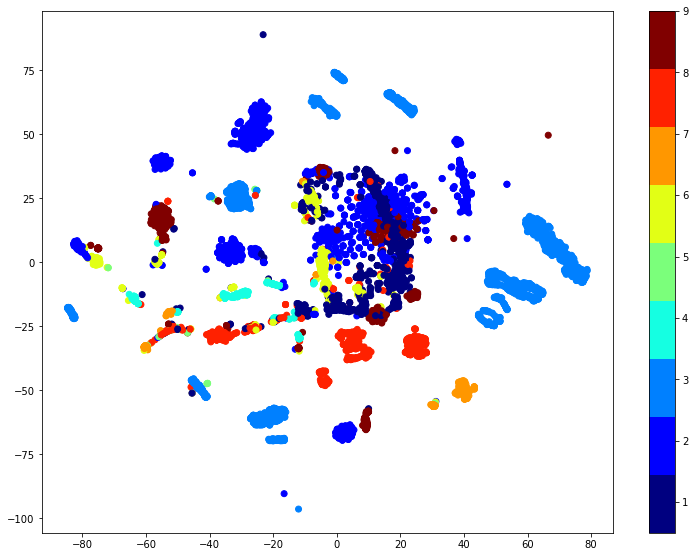

In [ ]:
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_byteimg)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y_byteimg, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
#train_x_byteasm_sparse= csr_matrix(train_x_byteimg)
#cv_x_byteasm_sparse= csr_matrix(cv_x_byteimg)
#test_x_byteasm_sparse= csr_matrix(test_x_byteimg)

In [ ]:
tsvd= TruncatedSVD(n_components= 100)
tsvd.fit(train_x_byteimg)
tsvd_var_ratios = tsvd.explained_variance_ratio_

tv1= tsvd_var_ratios
s=0
for i in tv1:
    s=s+i
print(s)

0.9920563454407926


In [ ]:
train_x_trun= tsvd.transform(train_x_byteimg)
cv_x_trun= tsvd.transform(cv_x_byteimg)
test_x_trun= tsvd.transform(test_x_byteimg)

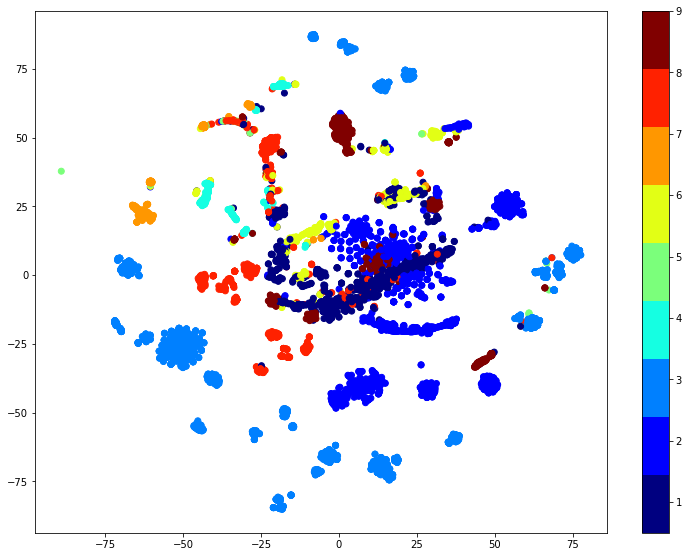

In [ ]:
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(train_x_trun)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=train_y_byteimg, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
train_y= np.array(train_y_byteimg).ravel()
cv_y= np.array(cv_y_byteimg).ravel()
test_y= np.array(test_y_byteimg).ravel()

100%|██████████| 6/6 [03:14<00:00, 32.48s/it]

log_loss for c =  10 is 0.1269817159265976
log_loss for c =  50 is 0.1079001315439102
log_loss for c =  100 is 0.10401331292182721
log_loss for c =  500 is 0.10251129980422621
log_loss for c =  1000 is 0.10174403718455846
log_loss for c =  2000 is 0.10166478852326154


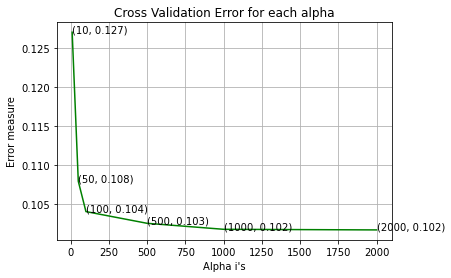

log loss for train data 0.029426183473359645
log loss for cv data 0.10166478852326154
log loss for test data 0.08097152572540091


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],random_state=42,n_jobs=-1)
r_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
predict_y = sig_clf.predict_proba(train_x_trun)
print ('log loss for train data',(log_loss(train_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(cv_x_trun)
print ('log loss for cv data',(log_loss(cv_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(test_x_trun)
print ('log loss for test data',(log_loss(test_y, predict_y, labels=sig_clf.classes_, eps=1e-15)))


Number of misclassified points  1.8859245630174795
-------------------------------------------------- Confusion matrix --------------------------------------------------


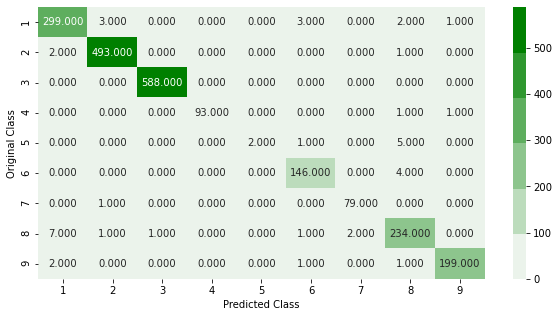

-------------------------------------------------- Precision matrix --------------------------------------------------


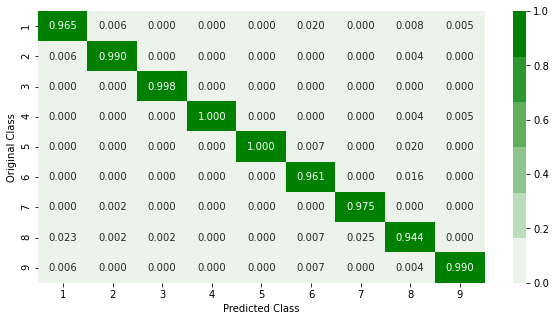

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


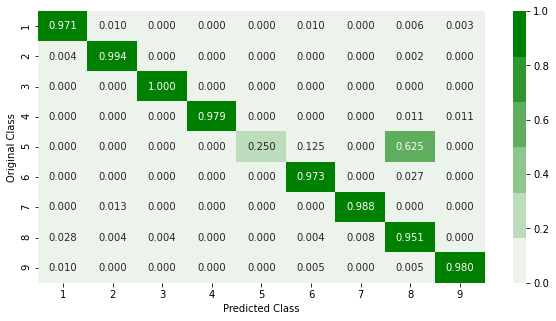

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

  0%|          | 0/6 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█▋        | 1/6 [00:10<00:53, 10.76s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|███▎      | 2/6 [00:43<01:34, 23.64s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████     | 3/6 [01:25<01:36, 32.19s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|██████▋   | 4/6 [02:44<01:40, 50.47s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|████████▎ | 5/6 [04:34<01:12, 72.14s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 6/6 [07:19<00:00, 73.31s/it] 

log_loss for c =  10 is 0.1241280589645042
log_loss for c =  50 is 0.09839646629987447
log_loss for c =  100 is 0.09681845776227939
log_loss for c =  500 is 0.0964500528976676
log_loss for c =  1000 is 0.09607757320245683
log_loss for c =  2000 is 0.0960753725927792


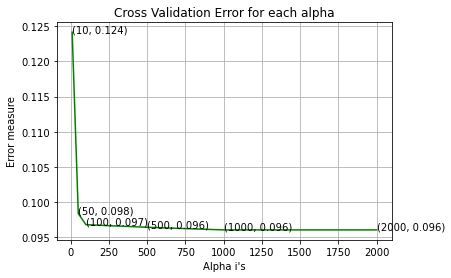

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For values of best alpha =  2000 The train log loss is: 0.029264870637206924
For values of best alpha =  2000 The cross validation log loss is: 0.0960753725927792
For values of best alpha =  2000 The test log loss is: 0.07793646124300231


NameError: name 'test_y_asm' is not defined

In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_x_trun,train_y)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_x_trun, train_y)
    predict_y = sig_clf.predict_proba(cv_x_trun)
    cv_log_error_array.append(log_loss(cv_y, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_x_trun,train_y)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_x_trun, train_y)
    
predict_y = sig_clf.predict_proba(train_x_trun)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_trun)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_trun)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y, predict_y))


Number of misclassified points  1.609935602575897
-------------------------------------------------- Confusion matrix --------------------------------------------------


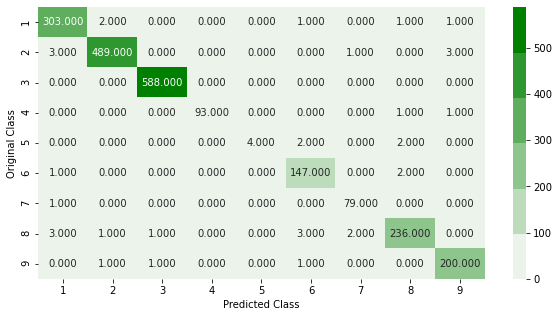

-------------------------------------------------- Precision matrix --------------------------------------------------


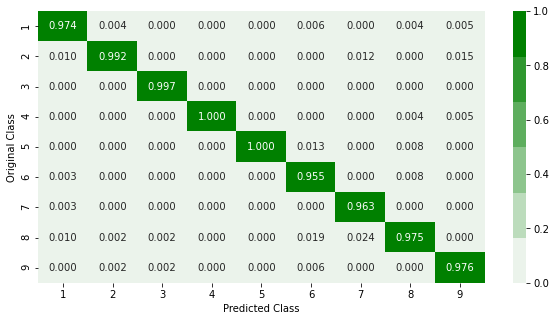

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


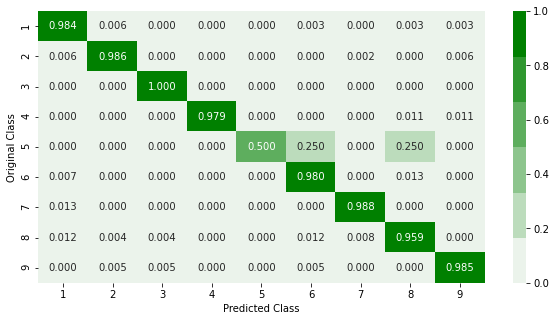

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(test_y,sig_clf.predict(test_x_trun))

##Unigram_byte_features + 2K_bigram_byte_features + ASM_features + 800_asm_features

In [ ]:
with open('/home/satya_anuragh/'+'uni_fin_df.pkl','rb') as uni_df:
    unigrams_df= pickle.load(uni_df)

In [ ]:
print(unigrams_df.shape)
print(unigrams_df.head())

(10868, 260)
                     ID       0      1      2      3      4      5      6  \
0  gGrBPR4c8KkNWHuA61UY   92047   9034   2538   2609   9317   8999   9496   
1  0gkj92oIleU4SYiCWpaM   19154   1271    566    576    836    895    413   
2  KakdO56B2GhiC3szw7TI   92866   6254   2872   2529   4768   1611   1685   
3  9NcndSbt1XFgpYO203D5   39616  13686  13020  18138  16839  15644  15761   
4  5102w8Hp4TRkWbIUXSgZ  124019   4713   5408   4836   4824   2917   2849   

       7      8  ...      f9      fa      fb      fc      fd      fe       ff  \
0   2514   9406  ...  2425.0  2602.0  2357.0  2543.0  2674.0  3130.0  50368.0   
1    361    677  ...   348.0   307.0   328.0   407.0   339.0   316.0   1609.0   
2   1182   5867  ...   697.0   774.0   582.0  1859.0   846.0  1713.0  24666.0   
3  17196  16453  ...   253.0   190.0   211.0  7351.0   208.0  7946.0  40769.0   
4   2907   5509  ...  1410.0  1251.0  1258.0  2457.0  1206.0  1541.0  18013.0   

        ??      size  Class  
0    41

In [ ]:
unigrams_df.drop(["ID","Class"],axis=1,inplace= True)

In [ ]:
unigrams_sparse= csr_matrix(unigrams_df,dtype=float)

In [ ]:
bigrams_sparse= load_npz('/home/satya_anuragh/'+'bigrams_sparse.npz')
print(bigrams_sparse.shape)

(10868, 66183)


In [ ]:
tsvd= TruncatedSVD(n_components= 2000)
tsvd.fit(bigrams_sparse)
tsvd_var_ratios_big = tsvd.explained_variance_ratio_

tv= tsvd_var_ratios_big
s=0
for i in tv:
    s=s+i
print(s)

0.9999918170518944


In [ ]:
bigrams_tsvd= tsvd.transform(bigrams_sparse)
print(bigrams_tsvd.shape)

(10868, 2000)


In [ ]:
with open('/home/satya_anuragh/'+'bigrams_tsvd.pkl','wb') as bitsvd:
    pickle.dump(bigrams_tsvd,bitsvd)

In [ ]:
with open('/home/satya_anuragh/'+'bigrams_tsvd.pkl','rb') as bitsvd:
    bigrams_tsvd= pickle.load(bitsvd)
print(bigrams_tsvd.shape)

(10868, 2000)


In [ ]:
with open('/home/satya_anuragh/'+'asm_fin_df.pkl','rb') as asmfin:
    asm_fin_df= pickle.load(asmfin)

In [ ]:
asm_fin_df.head()

ID HEADER:  .text: .Pav: .idata:   .data: .bss: .rdata:  \
0  gGrBPR4c8KkNWHuA61UY      18   69767     0     265      766     0    1304   
1  0gkj92oIleU4SYiCWpaM      17    4282     0     227      535     0    4272   
2  KakdO56B2GhiC3szw7TI      19  166789     0    1374    16988     0   18539   
3  9NcndSbt1XFgpYO203D5       0    7034     0     320  1735958     0    7384   
4  5102w8Hp4TRkWbIUXSgZ      18   96130     0     436   113834     0   68428   

  .edata: .rsrc:  ...   eax    ebx    ecx edi ebp esp  eip Unnamed: 0  \
0       0      0  ...     5    951     80   0  21   0  103       7934   
1       0      3  ...   194    177    626   0   7   0   86        114   
2       0      3  ...  7653  25085  14290   0  33   0  352      10637   
3       0      0  ...   456    663    408   0   7  18   78       3372   
4       0      3  ...  6939  14834   2295   0  23   0  295       1725   

    size_asm Class  
0   8.421979     9  
1   0.444657     1  
2  10.674423     1  
3  71.997081     2  
4  12.308698     8  

[5 rows x 55 columns]

In [ ]:
asm_fin_df.drop(["ID"],axis=1,inplace=True)

In [ ]:
asm_fin_sparse= csr_matrix(asm_fin_df,dtype=float)

In [ ]:
with open('/home/satya_anuragh/'+'asm_img_trim.pkl','rb') as ait:
    data_trimmed=pickle.load(ait)

In [ ]:
data_trimmed_new= pd.DataFrame(columns= data_trimmed.columns, index= range(data_trimmed.shape[0]))
print(data_trimmed_new.shape)
print(data_trimmed_new.head())

(10868, 801)
  filename ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_8 ASM_14  ...  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   

  ASM_990 ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997 ASM_998  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  ASM_999  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 row

In [ ]:
data_trimmed_new["filename"]= data_size_byte["ID"]
print(data_trimmed_new.head(2))

               filename ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_8  \
0  gGrBPR4c8KkNWHuA61UY   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  0gkj92oIleU4SYiCWpaM   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

  ASM_14  ... ASM_990 ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997  \
0    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  ASM_998 ASM_999  
0     NaN     NaN  
1     NaN     NaN  

[2 rows x 801 columns]


In [ ]:
for r in tqdm(range(len(data_trimmed["filename"]))):
    for k in range(len(data_trimmed_new["filename"])):
        if data_trimmed_new["filename"][r]==data_trimmed["filename"][k]:
            data_trimmed_new.iloc[r,:]= data_trimmed.iloc[k,:]

print(data_trimmed_new.head()) 

100%|██████████| 10868/10868 [20:17<00:00,  8.93it/s]

               filename ASM_0 ASM_1 ASM_2 ASM_3 ASM_4 ASM_5 ASM_6 ASM_8  \
0  gnuITJ1G6aZPskYvm3FX    72    69    65    68    69    82    58    48   
1  Bx9jm5GL6DYkWby3OKdi    72    69    65    68    69    82    58    48   
2  IUhoJuZ2y0iWz7sPx1cb    72    69    65    68    69    82    58    48   
3  K93H4bimO5rlYB2fuxMk    72    69    65    68    69    82    58    48   
4  GWQal1VFCtwrE47xNeSJ    46   116   101   120   116    58    48    52   

  ASM_14  ... ASM_990 ASM_991 ASM_992 ASM_993 ASM_994 ASM_995 ASM_996 ASM_997  \
0     48  ...      59      32      70     111     114     109      97     116   
1     48  ...     116     101     120     116      58      48      48      52   
2     48  ...      58      49      48      48      48      49      48      48   
3     48  ...     116     101     120     116      58      48      48      52   
4      9  ...      32      32      59      32      79     102     102     115   

  ASM_998 ASM_999  
0       9      32  
1      48      49  
2 

In [ ]:
data_trimmed_new.shape

(10868, 801)

In [ ]:
data_trimmed_new.drop(['filename'],axis=1,inplace=True)

asmimg_trim_sparse= csr_matrix(data_trimmed_new,dtype=float)

print(asmimg_trim_sparse.shape)

(10868, 800)


In [ ]:
new_fin_df= hstack([bigrams_tsvd,unigrams_sparse,asm_fin_sparse,asmimg_trim_sparse])

In [ ]:
with open('/home/satya_anuragh/'+'new_fin_df.pkl','wb') as newdf:
    pickle.dump(new_fin_df,newdf)

In [ ]:
with open('/home/satya_anuragh/'+'new_fin_df.pkl','rb') as newdf:
    new_fin_df= pickle.load(newdf)
print(new_fin_df.shape)

(10868, 3112)


In [ ]:
with open('/home/satya_anuragh/'+'y.pkl','rb') as ydata:
    y= pickle.load(ydata)

In [ ]:
from sklearn.model_selection import train_test_split
train_x_new,test_x_new,train_y_new,test_y_new= train_test_split(new_fin_df,y, test_size=0.2, stratify= y)
train_x_new,cv_x_new, train_y_new,cv_y_new= train_test_split(train_x_new,train_y_new,test_size=0.2, stratify=train_y_new)

In [ ]:
with open('/home/satya_anuragh/'+'train_x_new.pkl','wb') as train_new_x:
    pickle.dump(train_x_new,train_new_x)

with open('/home/satya_anuragh/'+'train_y_new.pkl','wb') as train_new_y:
    pickle.dump(train_y_new,train_new_y)
    
with open('/home/satya_anuragh/'+'cv_x_new.pkl','wb') as cv_new_x:
    pickle.dump(cv_x_new,cv_new_x)
    
with open('/home/satya_anuragh/'+'cv_y_new.pkl','wb') as cv_new_y:
    pickle.dump(cv_y_new,cv_new_y)
    
with open('/home/satya_anuragh/'+'test_x_new.pkl','wb') as test_new_x:
    pickle.dump(test_x_new,test_new_x)

with open('/home/satya_anuragh/'+'test_y_new.pkl','wb') as test_new_y:
    pickle.dump(test_y_new,test_new_y)

In [ ]:
with open('/home/satya_anuragh/'+'train_x_new.pkl','rb') as train_new_x:
    train_x_new= pickle.load(train_new_x)

with open('/home/satya_anuragh/'+'train_y_new.pkl','rb') as train_new_y:
    train_y_new= pickle.load(train_new_y)
    
with open('/home/satya_anuragh/'+'cv_x_new.pkl','rb') as cv_new_x:
    cv_x_new= pickle.load(cv_new_x)
    
with open('/home/satya_anuragh/'+'cv_y_new.pkl','rb') as cv_new_y:
    cv_y_new= pickle.load(cv_new_y)
    
with open('/home/satya_anuragh/'+'test_x_new.pkl','rb') as test_new_x:
    test_x_new= pickle.load(test_new_x)

with open('/home/satya_anuragh/'+'test_y_new.pkl','rb') as test_new_y:
    test_y_new= pickle.load(test_new_y)

  0%|          | 0/6 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█▋        | 1/6 [02:32<12:40, 152.03s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:01:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|███▎      | 2/6 [08:05<17:15, 258.91s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:09:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████     | 3/6 [14:34<15:54, 318.18s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|██████▋   | 4/6 [28:22<17:19, 519.57s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:31:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:35:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|████████▎ | 5/6 [51:25<13:50, 830.89s/it]/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:05:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 6/6 [1:33:00<00:00, 930.13s/it] 

log_loss for c =  10 is 0.014825656727461244
log_loss for c =  50 is 0.01070207923663686
log_loss for c =  100 is 0.010772889251148167
log_loss for c =  500 is 0.010773428341304441
log_loss for c =  1000 is 0.010773340999858836
log_loss for c =  2000 is 0.010773485959779653


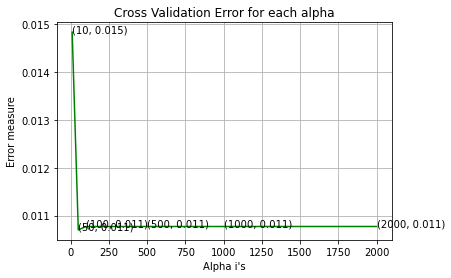

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:32:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:33:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For values of best alpha =  50 The train log loss is: 0.007539355264529028
For values of best alpha =  50 The cross validation log loss is: 0.01070207923663686
For values of best alpha =  50 The test log loss is: 0.009227325660052625


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_x_new,train_y_new)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_x_new, train_y_new)
    predict_y = sig_clf.predict_proba(cv_x_new)
    cv_log_error_array.append(log_loss(cv_y_new, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = min(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[cv_log_error_array.index(best_alpha)],nthread=-1)
x_cfl.fit(train_x_new,train_y_new)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_x_new, train_y_new)
    
predict_y = sig_clf.predict_proba(train_x_new)

print ('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The train log loss is:",log_loss(train_y_new, predict_y))
predict_y = sig_clf.predict_proba(cv_x_new)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The cross validation log loss is:",log_loss(cv_y_new, predict_y))
predict_y = sig_clf.predict_proba(test_x_new)
print('For values of best alpha = ', alpha[cv_log_error_array.index(best_alpha)], "The test log loss is:",log_loss(test_y_new, predict_y))
plot_confusion_matrix(test_y_new,sig_clf.predict(test_x_new))

Number of misclassified points  0.045998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


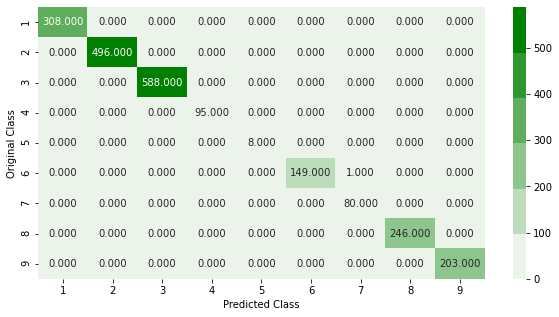

-------------------------------------------------- Precision matrix --------------------------------------------------


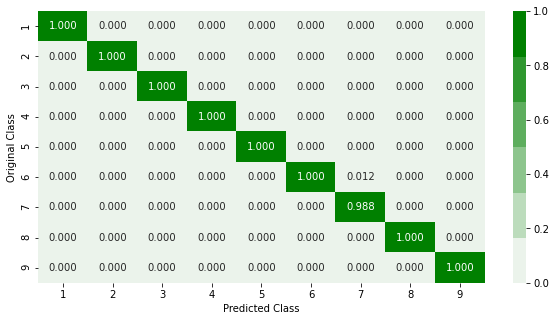

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


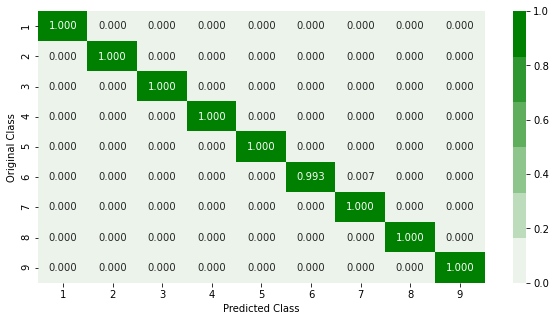

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(test_y_new,sig_clf.predict(test_x_new))

## Conclusion

In [ ]:
from prettytable import PrettyTable

P= PrettyTable()
P.field_names= ["Model","Dataset","Feature Reduction# Features","Hyperparameter","TrainLoss","TestLoss"]

P.add_row(["KNN Classifier","Bytes bi-grams","SVD,SVD_Comp=100", "K=3", 0.118, 0.221])
P.add_row(["Logistic Regression","Bytes bi-grams","SVD,SVD_Comp=100", "C=3", 1.144, 1.162])
P.add_row(["Random Forest", "Bytes bi-grams","SVD,SVD_Comp=100", "n_esti=500", 0.032, 0.099])
P.add_row(["XGBoost", "Bytes bi-grams","SVD,SVD_Comp=500","n_esti=1000", 0.037, 0.1206])

P.add_row(["KNN", "ASM uni-grams","SVD+PCA,SVD_Comp=30","n_neig=3", 0.117, 0.2337])
P.add_row(["Logistic Regression", "ASM uni-grams","SVD+PCA,SVD_Comp=30", "C=0.001", 1.5904, 1.5942])
P.add_row(["Random Forest", "ASM uni-grams","SVD+PCA,SVD_Comp=40","n_esti=2000", 0.0232, 0.0877])
P.add_row(["XgBoost", "ASM uni-grams","SVD+PCA,SVD_Comp=40", "n_esti=200", 0.0229, 0.0803])

P.add_row(["Random Forest", "bi-grams+ASMuni-grams","SVD,SVD_Comp=40", "n_esti=2000", 0.0268, 0.1056])
P.add_row(["XgBoost", "Byte+ASM+image","SVD,SVD_Comp=40","n_esti=2000", 0.0276, 0.1098])

P.add_row(["Random Forest", "Byte+ASM+image","SVD,SVD_Comp=100","n_esti=2000", 0.0294, 0.0809])

P.add_row(["XgBoost", "2kByte+ASM+800image","SVD,SVD_Comp=3000","n_esti=50", 0.00753, 0.00922])
print(P)

+---------------------+-----------------------+-----------------------------+----------------+-----------+----------+
|        Model        |        Dataset        | Feature Reduction# Features | Hyperparameter | TrainLoss | TestLoss |
+---------------------+-----------------------+-----------------------------+----------------+-----------+----------+
|    KNN Classifier   |     Bytes bi-grams    |       SVD,SVD_Comp=100      |      K=3       |   0.118   |  0.221   |
| Logistic Regression |     Bytes bi-grams    |       SVD,SVD_Comp=100      |      C=3       |   1.144   |  1.162   |
|    Random Forest    |     Bytes bi-grams    |       SVD,SVD_Comp=100      |   n_esti=500   |   0.032   |  0.099   |
|       XGBoost       |     Bytes bi-grams    |       SVD,SVD_Comp=500      |  n_esti=1000   |   0.037   |  0.1206  |
|         KNN         |     ASM uni-grams     |     SVD+PCA,SVD_Comp=30     |    n_neig=3    |   0.117   |  0.2337  |
| Logistic Regression |     ASM uni-grams     |     SVD+

##Procedure

Byte Files:

Extracted bigrams from bytes files.
Merged Bigrams and Unigrams frim bytefiles and formed a single dataset.
Performed TSNE to look at the distribution of the data.
Used SVD to reduce the number of variables and shortlisted the n_components basis the variance ratio and the performance of the models after fitting each of the datasets on various n_components of SVD.
Performed TSNE to look at the distribution of the various classes and used n_components as a hyperparameter to see how the distribution has changed. Used the best n_components basis visual observation of the spread of the classes.
Applied ML models on bytes features -> KNNClassifier,Logistic regression, Random Forest, XGBoost.

ASM Files:

Performed Multi variate analysis on the ASM features using TSNE.
Used SVD to reduce the number of variables and shortlisted the n_components basis the variance ratio and the performance of the models after fitting each of the datasets on various n_components of SVD.
Checked for multicollinearity amongst all the variables.
Applied PCA to remove multicollinearity and also for varible reduction
Performed TSNE to look at the distribution of the various classes and used n_components as a hyperparameter to see how the distribution has changed. Used the best n_components basis visual observation of the spread of the classes.
Applied ML models on ASM features -> K-Nearest Neigbors, Logistic regression, Random Forest, XGBoost.

ByteFiles+ASM Files

Merged both ASM and Bytes features
Used SVD to reduce the number of variables and shortlisted the n_components basis the variance ratio and the performance of the models after fitting each of the datasets on various n_components of SVD.
Performed TSNE to look at the distribution of the various classes and used n_components as a hyperparameter to see how the distribution has changed. Used the best n_components basis visual observation of the spread of the classes.
Applied ML models -> Random Forest, XgBoost as they performed well on the Bytes and ASM files

ByteFile+ASM Files+ASM Image

Extracted ASM image features using https://github.com/be-shekhar/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb
Merged ASM image features and Bytes bi-grams
Used SVD to reduce the number of variables and shortlisted the n_components basis the variance ratio and the performance of the models after fitting each of the datasets on various n_components of SVD.
Performed TSNE to look at the distribution of the various classes and used n_components as a hyperparameter to see how the distribution has changed. Used the best n_components basis visual observation of the spread of the classes.
Applied Tuned Random Forest Classifier to further reduce log-loss.

Unigram_byte_features + 2K_bigram_byte_features + ASM_features + 800_asm_features

Merged ASM image features and Bytes bi-grams
Used SVD to reduce the number of variables and shortlisted the n_components basis the variance ratio and the performance of the models after fitting each of the datasets on various n_components of SVD.
Performed TSNE to look at the distribution of the various classes and used n_components as a hyperparameter to see how the distribution has changed. Used the best n_components basis visual observation of the spread of the classes.
Applied Tuned XgBoost Classifier to further reduce log-loss.
